In [1]:
%reload_ext autoreload
%autoreload 2

import os
import argparse
import sys
import time

import numpy as np
from multiprocess import Pool

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

%matplotlib inline

Setting environment for Precision WorkStation


No vtk
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from aligner_v3 import Aligner

In [3]:
stack = 'CHATM3'

In [4]:
stack_m_spec = dict(name='atlasV6',
                   vol_type='score',
#                    structure=structure_m,
                    resolution='10.0um'
                   )

stack_f_spec = dict(name=stack,
                   vol_type='score',
                   detector_id=799,
#                    structure=convert_to_original_name(structure_m),
                    resolution='10.0um'
                   )

global_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=20)

In [5]:
global_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=global_alignment_spec,
# structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
# structures_m=['5N_L', '5N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', '12N', 'SC', 'IC']
# structures_m=['7N_L'],
# structures_m=['RMC_L', '3N_L', 'SNR_L'],
# structures_m=['5N_L', '7N_L', '7n_L', '5N_R', '7N_R', '7n_R']
#  structures_m=['VCA_L', 'VCA_R']
# structures_m=['5N_L', '7N_L', '7n_L', 'LC_L',  'LRt_L', 'Pn_L', 'Tz_L', 'VLL_L',  'SNR_L', 'Sp5C_L', '12N', 'SC', 'IC'],
structures_m=['3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '7N_L', '7N_R', '10N_L', '10N_R', '12N'],
fixed_structures_are_sided=True,
fixed_surroundings_have_positive_value=False,
                                                           fixed_use_surround=False
)

upstream_warp_id                                               None
transform_type                                               affine
terminate_thresh                                                NaN
grad_computation_sample_number                                10000
grid_search_sample_number                                       NaN
std_tx_um                                                      2000
std_ty_um                                                      2000
std_tz_um                                                      2000
std_theta_xy_degree                                              30
surround_weight                                                 NaN
regularization_weight                                           NaN
comment                           global reg no surr no grid search
max_iter_num                                                    200
Unnamed: 14                                                     NaN
Name: 20, dtype: object
surround nan False


Prior structure/index map not found. Generating a new one.
Loaded moving volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '7N_L', '7N_R'].
Prior structure/index map not found. Generating a new one.


voxel size for moving = 10.00 um
voxel size for fixed = 10.00 um
label_mapping_m2f {1: 2, 2: 11, 3: 9, 4: 6, 5: 5, 6: 8, 7: 3, 8: 4, 9: 10, 10: 1, 11: 7}
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0}


Loaded fixed volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '7N_L', '7N_R'].


In [6]:
from aligner_v3 import Aligner

In [7]:
aligner = Aligner(global_aligner_parameters['volume_fixed'], 
                  global_aligner_parameters['volume_moving'], 
                  labelIndexMap_m2f=global_aligner_parameters['label_mapping_m2f'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


In [8]:
T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol = bp.unpack_ndarray_file('/home/yuncong/' + stack_f_spec['name'] + '_T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.bp')

aligner.set_initial_transform(params=T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.flatten())

# aligner.set_centroid(centroid_m='structure_centroid', 
#                      centroid_f='centroid_m',
#                     indices_m=[local_aligner_parameters['structure_to_label_moving'][structure_m]])

aligner.set_centroid(centroid_m='origin', 
                     centroid_f='volume_centroid')

aligner.compute_gradient(smooth_first=True)

Set initial transform to [ 9.87580130e-01  1.57126095e-01  0.00000000e+00  1.26509838e+03
 -1.57126095e-01  9.87580130e-01  0.00000000e+00  4.90968802e+02
  0.00000000e+00  0.00000000e+00  1.00000000e+00  4.60000000e+02].
centroid_m: [1265.09837867  490.96880185  460.        ], centroid_f: [1369  408  457]
indices_f: set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])


In [9]:
aligner.set_label_weights(label_weights=global_aligner_parameters['label_weights_m'])

In [14]:
_, _ = aligner.optimize(tf_type=global_aligner_parameters['transform_type'], 
#                             max_iter_num=0,
                             max_iter_num=5000,
                             history_len=100, 
                             terminate_thresh_trans=.01,
                        terminate_thresh_rot=0.02,
                        grad_computation_sample_number=1000,
#                              full_lr=np.array([1,1,1,.01,.01,.01]),
                            lr1=10, lr2=.1,
                        affine_scaling_limits=(.9, 1.2)
                            )


iteration 0
Norm of gradient = 3.464102
in T: 0.00 0.00 0.00, out T: -10.00 -10.00 -10.00
step: 0.05 seconds
current score: 0.000222
new_T: [  0.9         -0.1         -0.1         -9.99999999   0.1
   1.1         -0.1        -10.           0.1          0.1
   1.1        -10.        ]
det: 1.12

iteration 1
1: 445 valid, 555 out-of-bound voxels after transform.
2: 416 valid, 584 out-of-bound voxels after transform.
3: 373 valid, 627 out-of-bound voxels after transform.
4: 370 valid, 630 out-of-bound voxels after transform.
5: 826 valid, 174 out-of-bound voxels after transform.
8: 999 valid, 1 out-of-bound voxels after transform.
9: 988 valid, 12 out-of-bound voxels after transform.
Norm of gradient = 2.213303
in T: -10.00 -10.00 -10.00, out T: -16.93 -7.00 -7.97
step: 0.06 seconds
current score: -0.002429
new_T: [ 9.00000000e-01 -1.98650278e-01 -2.64467435e-03 -1.69307767e+01
  6.48893678e-02  1.04118008e+00 -3.58187682e-02 -7.00039185e+00
  8.25640059e-02  7.81643022e-02  1.03276793e

11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 1.084596
in T: -45.00 -11.63 -16.43, out T: -43.14 -16.75 -16.76
step: 0.05 seconds
current score: -0.000344
new_T: [ 9.00000000e-01 -4.62210426e-01 -8.40675752e-02 -4.31396443e+01
 -1.90303227e-01  9.00000000e-01  2.74560492e-02 -1.67491013e+01
  2.33156786e-01  1.24275523e-01  9.18633189e-01 -1.67600579e+01]
det: 0.68

iteration 13
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 991 valid, 9 out-of-bound voxels after transform.
6: 682 valid, 318 out-of-

8: 999 valid, 1 out-of-bound voxels after transform.
9: 733 valid, 267 out-of-bound voxels after transform.
10: 997 valid, 3 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.783984
in T: -40.44 -17.34 -23.18, out T: -37.76 -14.95 -27.45
step: 0.04 seconds
current score: -0.000446
new_T: [  0.9         -0.55369811  -0.08973219 -37.76317494  -0.28717358
   0.9          0.06176611 -14.95463106   0.2027275    0.08100845
   0.9        -27.44869501]
det: 0.59

iteration 23
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/grad

8: 999 valid, 1 out-of-bound voxels after transform.
9: 776 valid, 224 out-of-bound voxels after transform.
11: 983 valid, 17 out-of-bound voxels after transform.
Norm of gradient = 0.377699
in T: -39.88 -13.08 -25.66, out T: -40.05 -13.87 -25.77
step: 0.04 seconds
current score: -0.000445
new_T: [  0.9         -0.56544277  -0.13913355 -40.04607034  -0.29836077
   0.9          0.04608215 -13.87474875   0.21501589   0.12768165
   0.9        -25.76973088]
det: 0.60

iteration 33
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 974

9: 708 valid, 292 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 979 valid, 21 out-of-bound voxels after transform.
Norm of gradient = 0.393947
in T: -40.50 -12.55 -25.04, out T: -40.17 -11.99 -26.43
step: 0.04 seconds
current score: -0.000480
new_T: [  0.9         -0.55910925  -0.15353057 -40.16847548  -0.30099244
   0.9          0.09349149 -11.99444235   0.23365964   0.15598395
   0.9        -26.4331482 ]
det: 0.59

iteration 43
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 95

9: 708 valid, 292 out-of-bound voxels after transform.
10: 997 valid, 3 out-of-bound voxels after transform.
11: 953 valid, 47 out-of-bound voxels after transform.
Norm of gradient = 0.272558
in T: -39.71 -11.31 -24.89, out T: -40.76 -12.00 -25.35
step: 0.04 seconds
current score: -0.000520
new_T: [  0.9         -0.53339949  -0.12366728 -40.76352301  -0.30234575
   0.9          0.06173137 -12.00053181   0.22502174   0.18987935
   0.9        -25.35462921]
det: 0.60

iteration 53
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 95

9: 778 valid, 222 out-of-bound voxels after transform.
11: 963 valid, 37 out-of-bound voxels after transform.
Norm of gradient = 0.264469
in T: -41.13 -12.01 -26.05, out T: -40.48 -12.36 -26.13
step: 0.04 seconds
current score: -0.000480
new_T: [  0.9         -0.52649405  -0.13413023 -40.48055515  -0.29627735
   0.9          0.06617075 -12.35981355   0.22040158   0.14873723
   0.9        -26.12556395]
det: 0.60

iteration 63
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 960 valid, 40 out-of-bound voxels after transform.
6: 46

9: 786 valid, 214 out-of-bound voxels after transform.
11: 986 valid, 14 out-of-bound voxels after transform.
Norm of gradient = 0.279117
in T: -43.00 -11.44 -27.27, out T: -42.90 -11.69 -27.24
step: 0.04 seconds
current score: -0.000485
new_T: [  0.9         -0.53995718  -0.13847843 -42.89698884  -0.31927144
   0.9          0.07713338 -11.69071386   0.21156238   0.15467239
   0.9        -27.23783211]
det: 0.59

iteration 73
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 valid, 43 out-of-bound voxels after transform.
6: 45

9: 746 valid, 254 out-of-bound voxels after transform.
11: 974 valid, 26 out-of-bound voxels after transform.
Norm of gradient = 0.353152
in T: -41.14 -11.45 -25.54, out T: -43.02 -11.96 -25.93
step: 0.04 seconds
current score: -0.000467
new_T: [  0.9         -0.52546788  -0.14112766 -43.02211111  -0.29807622
   0.9          0.05922781 -11.96391112   0.23055708   0.16264605
   0.9        -25.93068744]
det: 0.61

iteration 83
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 964 valid, 36 out-of-bound voxels after transform.
6: 48

9: 643 valid, 357 out-of-bound voxels after transform.
10: 977 valid, 23 out-of-bound voxels after transform.
11: 924 valid, 76 out-of-bound voxels after transform.
Norm of gradient = 0.335552
in T: -39.42 -13.33 -25.13, out T: -39.46 -13.43 -23.91
step: 0.04 seconds
current score: -0.000673
new_T: [  0.9         -0.50759378  -0.12275662 -39.45950922  -0.2985804
   0.9          0.04796006 -13.42878371   0.24043035   0.18965569
   0.9        -23.90752192]
det: 0.61

iteration 93
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 96

9: 723 valid, 277 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 953 valid, 47 out-of-bound voxels after transform.
Norm of gradient = 0.233709
in T: -39.36 -13.93 -25.95, out T: -39.86 -13.48 -26.41
step: 0.04 seconds
current score: -0.000505
new_T: [  0.9         -0.51061973  -0.11756737 -39.85900248  -0.29745444
   0.9          0.06229892 -13.47804043   0.22779502   0.18210616
   0.9        -26.41405976]
det: 0.61

iteration 103
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 9

9: 767 valid, 233 out-of-bound voxels after transform.
11: 986 valid, 14 out-of-bound voxels after transform.
Norm of gradient = 0.254314
in T: -40.93 -11.91 -26.01, out T: -41.05 -12.44 -25.82
step: 0.04 seconds
current score: -0.000445
new_T: [  0.9         -0.55229591  -0.10832654 -41.05445379  -0.30074882
   0.9          0.04594742 -12.44021293   0.22597357   0.18486672
   0.9        -25.82022193]
det: 0.59

iteration 113
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 967 valid, 33 out-of-bound voxels after transform.
6: 5

9: 832 valid, 168 out-of-bound voxels after transform.
11: 989 valid, 11 out-of-bound voxels after transform.
Norm of gradient = 0.208651
in T: -39.63 -13.62 -26.28, out T: -39.19 -13.30 -25.23
step: 0.04 seconds
current score: -0.000384
new_T: [  0.9         -0.52972254  -0.10777478 -39.18679789  -0.30340929
   0.9          0.04830866 -13.30034967   0.21844967   0.19216725
   0.9        -25.2312143 ]
det: 0.60

iteration 123
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 971 valid, 29 out-of-bound voxels after transform.
6: 4

9: 751 valid, 249 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 961 valid, 39 out-of-bound voxels after transform.
Norm of gradient = 0.237176
in T: -39.98 -13.62 -23.99, out T: -39.04 -12.50 -23.94
step: 0.04 seconds
current score: -0.000398
new_T: [  0.9         -0.55564174  -0.10854943 -39.04209288  -0.28500957
   0.9          0.04755953 -12.49655868   0.2182873    0.18718516
   0.9        -23.94426882]
det: 0.60

iteration 133
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 9

9: 801 valid, 199 out-of-bound voxels after transform.
11: 988 valid, 12 out-of-bound voxels after transform.
Norm of gradient = 0.198157
in T: -38.92 -15.74 -26.16, out T: -37.89 -15.42 -25.88
step: 0.04 seconds
current score: -0.000416
new_T: [ 9.00000000e-01 -5.64450171e-01 -1.00095128e-01 -3.78924350e+01
 -2.88906883e-01  9.00000000e-01  3.70124845e-02 -1.54199876e+01
  2.17057767e-01  1.98465191e-01  9.00000000e-01 -2.58761720e+01]
det: 0.60

iteration 143
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 valid, 46 out-o

9: 795 valid, 205 out-of-bound voxels after transform.
11: 989 valid, 11 out-of-bound voxels after transform.
Norm of gradient = 0.228240
in T: -39.35 -13.95 -26.22, out T: -39.10 -13.73 -25.18
step: 0.04 seconds
current score: -0.000384
new_T: [  0.9         -0.57303933  -0.10108793 -39.09632921  -0.28820276
   0.90010726   0.04208149 -13.72582529   0.22204863   0.20310507
   0.9        -25.18051193]
det: 0.59

iteration 153
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 971 valid, 29 out-of-bound voxels after transform.
6: 5

9: 764 valid, 236 out-of-bound voxels after transform.
11: 967 valid, 33 out-of-bound voxels after transform.
Norm of gradient = 0.131959
in T: -38.32 -13.06 -24.01, out T: -38.67 -12.94 -24.20
step: 0.04 seconds
current score: -0.000400
new_T: [  0.9         -0.5642196   -0.08941284 -38.6654802   -0.29860424
   0.9          0.05188199 -12.93957605   0.21390541   0.1849243
   0.90078266 -24.19695064]
det: 0.59

iteration 163
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 969 valid, 31 out-of-bound voxels after transform.
6: 54

9: 805 valid, 195 out-of-bound voxels after transform.
11: 987 valid, 13 out-of-bound voxels after transform.
Norm of gradient = 0.156826
in T: -39.42 -12.53 -25.40, out T: -39.72 -12.76 -25.23
step: 0.04 seconds
current score: -0.000351
new_T: [  0.9         -0.55886586  -0.10976067 -39.72087986  -0.30187215
   0.9          0.0577458  -12.76000556   0.21797149   0.17084553
   0.9        -25.2258969 ]
det: 0.59

iteration 173
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 valid, 42 out-of-bound voxels after transform.
6: 4

9: 726 valid, 274 out-of-bound voxels after transform.
10: 997 valid, 3 out-of-bound voxels after transform.
11: 965 valid, 35 out-of-bound voxels after transform.
Norm of gradient = 0.202760
in T: -40.17 -11.69 -24.47, out T: -40.61 -11.90 -25.04
step: 0.04 seconds
current score: -0.000454
new_T: [  0.9         -0.55281421  -0.10923751 -40.6070966   -0.29866742
   0.9          0.05498288 -11.90111611   0.21905121   0.17661528
   0.9        -25.03839579]
det: 0.59

iteration 183
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 9

9: 755 valid, 245 out-of-bound voxels after transform.
11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.174011
in T: -40.96 -12.10 -25.62, out T: -41.04 -11.93 -25.93
step: 0.04 seconds
current score: -0.000427
new_T: [  0.9         -0.55091457  -0.12194753 -41.04380674  -0.30014363
   0.9          0.0598695  -11.92819454   0.22256983   0.1709466
   0.9        -25.92533637]
det: 0.59

iteration 193
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 961 valid, 39 out-of-bound voxels after transform.
6: 45

9: 731 valid, 269 out-of-bound voxels after transform.
11: 952 valid, 48 out-of-bound voxels after transform.
Norm of gradient = 0.246646
in T: -41.77 -11.59 -25.14, out T: -41.41 -12.51 -25.93
step: 0.04 seconds
current score: -0.000453
new_T: [  0.9         -0.5572494   -0.12902614 -41.41298122  -0.30468767
   0.9          0.06207878 -12.50804432   0.2275118    0.18270036
   0.9        -25.93460383]
det: 0.59

iteration 203
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 4

9: 777 valid, 223 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.206323
in T: -40.77 -11.85 -26.81, out T: -41.20 -12.65 -26.48
step: 0.04 seconds
current score: -0.000463
new_T: [  0.9         -0.55073478  -0.12317534 -41.19917852  -0.30727408
   0.9          0.06346588 -12.65107887   0.22535718   0.18228027
   0.9        -26.47679792]
det: 0.59

iteration 213
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 4

9: 762 valid, 238 out-of-bound voxels after transform.
11: 985 valid, 15 out-of-bound voxels after transform.
Norm of gradient = 0.185105
in T: -40.91 -12.95 -25.37, out T: -40.23 -12.62 -26.33
step: 0.04 seconds
current score: -0.000432
new_T: [  0.9         -0.54732984  -0.12367304 -40.22683637  -0.3015919
   0.9          0.06222554 -12.62015436   0.22061743   0.17139531
   0.9        -26.32536208]
det: 0.59

iteration 223
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 valid, 42 out-of-bound voxels after transform.
6: 45

9: 714 valid, 286 out-of-bound voxels after transform.
10: 993 valid, 7 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.127565
in T: -40.36 -11.92 -26.09, out T: -40.61 -12.43 -26.36
step: 0.04 seconds
current score: -0.000573
new_T: [  0.9         -0.55250053  -0.12857036 -40.60643368  -0.29737978
   0.9          0.06436367 -12.42568703   0.239023     0.18429048
   0.9        -26.3627508 ]
det: 0.60

iteration 233
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 9

9: 827 valid, 173 out-of-bound voxels after transform.
11: 993 valid, 7 out-of-bound voxels after transform.
Norm of gradient = 0.158776
in T: -41.91 -11.10 -27.22, out T: -42.10 -11.55 -27.01
step: 0.04 seconds
current score: -0.000371
new_T: [  0.9         -0.56388567  -0.14692575 -42.09761117  -0.3044374
   0.9          0.07320877 -11.55159937   0.22258294   0.17890836
   0.9        -27.01454947]
det: 0.59

iteration 243
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 949 valid, 51 out-of-bound voxels after transform.
6: 480

9: 744 valid, 256 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.263161
in T: -44.09 -10.29 -27.91, out T: -43.98 -9.64 -27.14
step: 0.04 seconds
current score: -0.000575
new_T: [  0.901573    -0.57630472  -0.16375741 -43.98059986  -0.30624756
   0.9          0.0825369   -9.64186425   0.23947704   0.19255025
   0.9        -27.13613953]
det: 0.59

iteration 253
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 44

9: 766 valid, 234 out-of-bound voxels after transform.
11: 954 valid, 46 out-of-bound voxels after transform.
Norm of gradient = 0.168583
in T: -43.90 -9.73 -28.23, out T: -43.33 -9.80 -27.48
step: 0.05 seconds
current score: -0.000557
new_T: [  0.90107389  -0.58835585  -0.1726224  -43.33129725  -0.30723257
   0.9          0.07951801  -9.80340755   0.23202379   0.19434121
   0.9        -27.47659566]
det: 0.59

iteration 263
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 valid, 49 out-of-bound voxels after transform.
6: 409

9: 763 valid, 237 out-of-bound voxels after transform.
11: 967 valid, 33 out-of-bound voxels after transform.
Norm of gradient = 0.146851
in T: -41.88 -10.35 -27.86, out T: -41.79 -10.15 -27.58
step: 0.04 seconds
current score: -0.000522
new_T: [  0.9         -0.59667815  -0.16769907 -41.78886717  -0.30569782
   0.9          0.08972343 -10.1502754    0.22448989   0.1965429
   0.9        -27.58021635]
det: 0.58

iteration 273
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 940 valid, 60 out-of-bound voxels after transform.
6: 47

9: 777 valid, 223 out-of-bound voxels after transform.
11: 977 valid, 23 out-of-bound voxels after transform.
Norm of gradient = 0.240730
in T: -42.73 -8.87 -26.79, out T: -43.82 -9.06 -26.12
step: 0.04 seconds
current score: -0.000437
new_T: [  0.9         -0.63540804  -0.18909427 -43.82337152  -0.31094104
   0.9          0.09115248  -9.05769998   0.21978492   0.22566187
   0.9        -26.1195633 ]
det: 0.57

iteration 283
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 valid, 43 out-of-bound voxels after transform.
6: 461

9: 759 valid, 241 out-of-bound voxels after transform.
11: 967 valid, 33 out-of-bound voxels after transform.
Norm of gradient = 0.218065
in T: -44.16 -6.88 -27.16, out T: -44.62 -6.96 -27.04
step: 0.04 seconds
current score: -0.000495
new_T: [  0.9         -0.69186669  -0.23036309 -44.61754384  -0.32827168
   0.9          0.10069347  -6.95938844   0.21469708   0.22401231
   0.9        -27.03673448]
det: 0.55

iteration 293
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 valid, 49 out-of-bound voxels after transform.
6: 462

9: 768 valid, 232 out-of-bound voxels after transform.
11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.186475
in T: -40.80 -5.40 -27.93, out T: -39.99 -4.79 -27.39
step: 0.04 seconds
current score: -0.000493
new_T: [  0.90035836  -0.72542044  -0.26103382 -39.9926054   -0.3310236
   0.9          0.10942999  -4.78779947   0.22867838   0.22989275
   0.9        -27.39380054]
det: 0.55

iteration 303
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 471 

9: 763 valid, 237 out-of-bound voxels after transform.
11: 966 valid, 34 out-of-bound voxels after transform.
Norm of gradient = 0.170572
in T: -38.54 -3.15 -27.65, out T: -38.45 -2.20 -27.49
step: 0.04 seconds
current score: -0.000515
new_T: [  0.9         -0.79759242  -0.29479216 -38.44552998  -0.34119473
   0.9          0.11740889  -2.20458661   0.22364408   0.26231199
   0.9        -27.48631217]
det: 0.52

iteration 313
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 937 valid, 63 out-of-bound voxels after transform.
6: 457

9: 782 valid, 218 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 974 valid, 26 out-of-bound voxels after transform.
Norm of gradient = 0.140562
in T: -38.98 0.53 -28.19, out T: -39.36 0.72 -28.27
step: 0.04 seconds
current score: -0.000470
new_T: [  0.9         -0.86938094  -0.34047457 -39.35769915  -0.3500992
   0.9007179    0.14823858   0.72358902   0.22090975   0.2811755
   0.9        -28.27361246]
det: 0.49

iteration 323
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 927 val

9: 822 valid, 178 out-of-bound voxels after transform.
11: 977 valid, 23 out-of-bound voxels after transform.
Norm of gradient = 0.124815
in T: -38.70 1.80 -29.16, out T: -38.24 1.30 -29.16
step: 0.04 seconds
current score: -0.000429
new_T: [  0.9         -0.92644011  -0.37292119 -38.24058819  -0.36457193
   0.90068789   0.17418503   1.29847933   0.2115325    0.25673862
   0.9        -29.16145497]
det: 0.46

iteration 333
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 924 valid, 76 out-of-bound voxels after transform.
6: 432 v

6: 462 valid, 538 out-of-bound voxels after transform.
7: 980 valid, 20 out-of-bound voxels after transform.
9: 715 valid, 285 out-of-bound voxels after transform.
10: 991 valid, 9 out-of-bound voxels after transform.
11: 939 valid, 61 out-of-bound voxels after transform.
Norm of gradient = 0.131908
in T: -38.62 3.48 -25.98, out T: -38.32 3.46 -26.05
step: 0.04 seconds
current score: -0.000541
new_T: [  0.9         -0.9929925   -0.38648296 -38.31692439  -0.36665709
   0.90614366   0.17211607   3.46156411   0.22802809   0.27692643
   0.9        -26.05248523]
det: 0.44

iteration 343
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bou

11: 930 valid, 70 out-of-bound voxels after transform.
Norm of gradient = 0.196448
in T: -38.74 3.34 -24.78, out T: -39.38 3.96 -24.98
step: 0.04 seconds
current score: -0.000501
new_T: [  0.9         -1.04318644  -0.41197811 -39.38411988  -0.36276118
   0.90643537   0.18214167   3.96058386   0.21474147   0.29082466
   0.9        -24.98074787]
det: 0.43

iteration 352
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 963 valid, 37 out-of-bound voxels after transform.
6: 516 valid, 484 out-of-bound voxels after transform.
7: 955 v

9: 762 valid, 238 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 953 valid, 47 out-of-bound voxels after transform.
Norm of gradient = 0.233000
in T: -36.92 3.95 -25.29, out T: -37.41 3.89 -24.23
step: 0.04 seconds
current score: -0.000420
new_T: [  0.9         -1.06463659  -0.41029532 -37.40568665  -0.36971714
   0.9025697    0.18187615   3.89412396   0.22037182   0.32113606
   0.9        -24.23425823]
det: 0.41

iteration 362
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 963 v

9: 759 valid, 241 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 949 valid, 51 out-of-bound voxels after transform.
Norm of gradient = 0.166370
in T: -36.98 4.10 -25.08, out T: -36.70 4.12 -25.16
step: 0.04 seconds
current score: -0.000425
new_T: [  0.9         -1.08406045  -0.40652672 -36.70216426  -0.37172578
   0.9008651    0.19738168   4.12417262   0.20854778   0.32471776
   0.9        -25.16430759]
det: 0.39

iteration 372
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 965 v

9: 781 valid, 219 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 956 valid, 44 out-of-bound voxels after transform.
Norm of gradient = 0.137064
in T: -36.12 4.33 -25.78, out T: -36.11 4.38 -25.87
step: 0.04 seconds
current score: -0.000371
new_T: [  0.9         -1.08936213  -0.41069847 -36.10677948  -0.36947571
   0.9          0.19562758   4.38120251   0.20657056   0.30625747
   0.9        -25.86759169]
det: 0.39

iteration 382
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 v

9: 756 valid, 244 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 955 valid, 45 out-of-bound voxels after transform.
Norm of gradient = 0.125996
in T: -35.50 4.57 -26.24, out T: -35.17 4.73 -26.94
step: 0.04 seconds
current score: -0.000450
new_T: [  0.90035002  -1.09712394  -0.40072609 -35.16829511  -0.37710127
   0.9          0.18593483   4.73051857   0.20092155   0.30652237
   0.9        -26.93641954]
det: 0.38

iteration 392
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 963 v

9: 782 valid, 218 out-of-bound voxels after transform.
11: 969 valid, 31 out-of-bound voxels after transform.
Norm of gradient = 0.136015
in T: -35.05 5.00 -26.48, out T: -35.46 5.66 -26.55
step: 0.04 seconds
current score: -0.000406
new_T: [  0.9         -1.10506153  -0.39113842 -35.45551684  -0.37095432
   0.90624558   0.18439731   5.66043869   0.19781065   0.31361894
   0.9        -26.55357853]
det: 0.39

iteration 402
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 968 valid, 32 out-of-bound voxels after transform.
6: 523 v

9: 696 valid, 304 out-of-bound voxels after transform.
10: 989 valid, 11 out-of-bound voxels after transform.
11: 917 valid, 83 out-of-bound voxels after transform.
Norm of gradient = 0.193959
in T: -34.93 4.87 -24.83, out T: -34.65 5.11 -25.41
step: 0.04 seconds
current score: -0.000593
new_T: [  0.9         -1.12394446  -0.39451792 -34.64520747  -0.37234218
   0.9          0.18965826   5.11293498   0.21594448   0.31882489
   0.9        -25.41464797]
det: 0.38

iteration 412
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 961 

9: 750 valid, 250 out-of-bound voxels after transform.
10: 997 valid, 3 out-of-bound voxels after transform.
11: 944 valid, 56 out-of-bound voxels after transform.
Norm of gradient = 0.075926
in T: -33.34 4.01 -25.91, out T: -33.06 3.72 -25.84
step: 0.04 seconds
current score: -0.000473
new_T: [  0.9         -1.11522253  -0.38498004 -33.06486411  -0.37501442
   0.9          0.1807751    3.7170446    0.21359722   0.32955144
   0.9        -25.83528924]
det: 0.38

iteration 422
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 963 v

9: 784 valid, 216 out-of-bound voxels after transform.
11: 968 valid, 32 out-of-bound voxels after transform.
Norm of gradient = 0.170839
in T: -34.32 4.40 -26.94, out T: -33.70 4.97 -26.45
step: 0.04 seconds
current score: -0.000447
new_T: [  0.9         -1.13563796  -0.39246321 -33.69687554  -0.37474583
   0.90170101   0.18603391   4.96629256   0.20774056   0.31554039
   0.9        -26.45015929]
det: 0.37

iteration 432
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 valid, 49 out-of-bound voxels after transform.
6: 502 v

9: 796 valid, 204 out-of-bound voxels after transform.
11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.128573
in T: -33.38 3.91 -26.47, out T: -32.75 4.13 -26.68
step: 0.04 seconds
current score: -0.000384
new_T: [  0.9         -1.13979151  -0.39694378 -32.74843594  -0.37144039
   0.90181533   0.19440872   4.12541685   0.20407469   0.32613539
   0.9        -26.67598594]
det: 0.37

iteration 442
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 485 v

9: 786 valid, 214 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 966 valid, 34 out-of-bound voxels after transform.
Norm of gradient = 0.142847
in T: -32.64 5.26 -27.01, out T: -32.97 5.12 -27.44
step: 0.04 seconds
current score: -0.000457
new_T: [  0.9         -1.14464616  -0.38203471 -32.97071774  -0.3789825
   0.90350369   0.18775419   5.12115221   0.20264383   0.31090504
   0.9        -27.44346079]
det: 0.36

iteration 452
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 va

9: 792 valid, 208 out-of-bound voxels after transform.
11: 971 valid, 29 out-of-bound voxels after transform.
Norm of gradient = 0.123276
in T: -33.70 5.22 -26.93, out T: -33.07 4.76 -27.00
step: 0.04 seconds
current score: -0.000371
new_T: [  0.9         -1.15051362  -0.37275015 -33.06943737  -0.37812537
   0.9          0.18148667   4.75862867   0.21076457   0.30603832
   0.9        -26.99853707]
det: 0.36

iteration 462
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 valid, 49 out-of-bound voxels after transform.
6: 498 v

9: 800 valid, 200 out-of-bound voxels after transform.
11: 969 valid, 31 out-of-bound voxels after transform.
Norm of gradient = 0.209330
in T: -33.42 4.98 -27.58, out T: -33.48 4.45 -26.72
step: 0.04 seconds
current score: -0.000426
new_T: [  0.9         -1.15516739  -0.39068551 -33.47820146  -0.37636097
   0.90264834   0.19783371   4.45005444   0.21536592   0.30852782
   0.9        -26.72318764]
det: 0.36

iteration 472
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 944 valid, 56 out-of-bound voxels after transform.
6: 510 v

9: 725 valid, 275 out-of-bound voxels after transform.
11: 947 valid, 53 out-of-bound voxels after transform.
Norm of gradient = 0.126444
in T: -33.44 4.98 -25.62, out T: -33.52 5.02 -25.71
step: 0.05 seconds
current score: -0.000504
new_T: [  0.9         -1.16205642  -0.39458448 -33.51701151  -0.37097536
   0.90512518   0.19047967   5.0172938    0.21037877   0.3193737
   0.9        -25.71180216]
det: 0.37

iteration 482
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 959 valid, 41 out-of-bound voxels after transform.
6: 514 va

9: 735 valid, 265 out-of-bound voxels after transform.
10: 996 valid, 4 out-of-bound voxels after transform.
11: 944 valid, 56 out-of-bound voxels after transform.
Norm of gradient = 0.240121
in T: -33.26 4.56 -25.38, out T: -33.43 4.28 -26.15
step: 0.04 seconds
current score: -0.000460
new_T: [  0.9         -1.16258781  -0.38794251 -33.42585072  -0.36948871
   0.90740797   0.19296565   4.28427654   0.2049044    0.3113088
   0.9        -26.14729186]
det: 0.37

iteration 492
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 959 va

9: 770 valid, 230 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 953 valid, 47 out-of-bound voxels after transform.
Norm of gradient = 0.184312
in T: -31.82 3.53 -25.93, out T: -31.56 4.39 -26.30
step: 0.04 seconds
current score: -0.000419
new_T: [  0.9         -1.14863436  -0.38102817 -31.56224625  -0.36939412
   0.90300263   0.18496288   4.39049768   0.20855237   0.31313926
   0.9        -26.2968535 ]
det: 0.37

iteration 502
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 944 v

9: 770 valid, 230 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.065110
in T: -32.52 4.25 -26.49, out T: -32.60 3.94 -26.67
step: 0.04 seconds
current score: -0.000443
new_T: [  0.9         -1.15947256  -0.38508203 -32.59902009  -0.37032869
   0.9017504    0.19085537   3.93893315   0.20874675   0.31855489
   0.9        -26.67031441]
det: 0.36

iteration 512
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 960 valid, 40 out-of-bound voxels after transform.
6: 494 v

9: 774 valid, 226 out-of-bound voxels after transform.
11: 967 valid, 33 out-of-bound voxels after transform.
Norm of gradient = 0.122647
in T: -32.18 3.76 -26.50, out T: -32.34 3.83 -26.81
step: 0.04 seconds
current score: -0.000401
new_T: [  0.9         -1.1585534   -0.37029342 -32.34132365  -0.37297591
   0.9          0.18061783   3.83155337   0.19906762   0.33062909
   0.9        -26.80792137]
det: 0.36

iteration 522
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 931 valid, 69 out-of-bound voxels after transform.
6: 497 v

9: 753 valid, 247 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 951 valid, 49 out-of-bound voxels after transform.
Norm of gradient = 0.145874
in T: -32.42 3.79 -26.02, out T: -31.99 3.92 -26.44
step: 0.04 seconds
current score: -0.000485
new_T: [  0.90025762  -1.1528436   -0.37380328 -31.98899966  -0.36822276
   0.9026448    0.17989622   3.92437515   0.20883508   0.31981425
   0.9        -26.43627242]
det: 0.37

iteration 532
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 965 v

9: 794 valid, 206 out-of-bound voxels after transform.
11: 969 valid, 31 out-of-bound voxels after transform.
Norm of gradient = 0.150383
in T: -32.78 4.56 -27.10, out T: -32.94 5.02 -26.82
step: 0.04 seconds
current score: -0.000379
new_T: [  0.9         -1.16669585  -0.37085896 -32.93898908  -0.36550347
   0.90831727   0.18375175   5.02429441   0.20338035   0.30517654
   0.9        -26.82318073]
det: 0.37

iteration 542
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 944 valid, 56 out-of-bound voxels after transform.
6: 516 v

9: 767 valid, 233 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.146582
in T: -33.42 4.62 -26.57, out T: -33.91 5.15 -26.92
step: 0.04 seconds
current score: -0.000414
new_T: [  0.9         -1.16953134  -0.38066171 -33.91289394  -0.37564814
   0.90838975   0.18297652   5.14890694   0.20180633   0.30210028
   0.9        -26.9212086 ]
det: 0.36

iteration 552
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 967 valid, 33 out-of-bound voxels after transform.
6: 520 v

9: 756 valid, 244 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 952 valid, 48 out-of-bound voxels after transform.
Norm of gradient = 0.124588
in T: -33.43 5.17 -26.01, out T: -33.13 5.25 -26.27
step: 0.04 seconds
current score: -0.000448
new_T: [  0.9         -1.1606724   -0.38239336 -33.13336335  -0.37472622
   0.90625456   0.18536414   5.25001025   0.20422249   0.31212995
   0.9        -26.26700101]
det: 0.36

iteration 562
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 971 v

9: 776 valid, 224 out-of-bound voxels after transform.
11: 962 valid, 38 out-of-bound voxels after transform.
Norm of gradient = 0.163993
in T: -33.00 4.74 -26.58, out T: -32.64 3.92 -26.49
step: 0.04 seconds
current score: -0.000413
new_T: [  0.9         -1.14532118  -0.37969937 -32.63790339  -0.37314354
   0.9          0.18251199   3.92240595   0.20434654   0.30850391
   0.9        -26.49299   ]
det: 0.36

iteration 572
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 943 valid, 57 out-of-bound voxels after transform.
6: 481 v

9: 778 valid, 222 out-of-bound voxels after transform.
11: 949 valid, 51 out-of-bound voxels after transform.
Norm of gradient = 0.149939
in T: -32.71 4.24 -26.19, out T: -32.51 5.06 -26.10
step: 0.04 seconds
current score: -0.000409
new_T: [  0.9         -1.15578228  -0.39220962 -32.50765907  -0.37043456
   0.91297426   0.18360374   5.06365512   0.20325504   0.30855212
   0.9        -26.09614669]
det: 0.38

iteration 582
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 valid, 43 out-of-bound voxels after transform.
6: 522 v

9: 765 valid, 235 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.104170
in T: -32.73 4.64 -26.13, out T: -32.87 4.35 -26.15
step: 0.04 seconds
current score: -0.000445
new_T: [  0.9         -1.15703939  -0.38736718 -32.87097481  -0.37784872
   0.90695984   0.18667778   4.3541732    0.20935442   0.31882654
   0.9        -26.15086807]
det: 0.36

iteration 592
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 942 valid, 58 out-of-bound voxels after transform.
6: 497 v

7: 952 valid, 48 out-of-bound voxels after transform.
9: 765 valid, 235 out-of-bound voxels after transform.
11: 950 valid, 50 out-of-bound voxels after transform.
Norm of gradient = 0.185965
in T: -32.73 4.45 -26.40, out T: -33.02 4.66 -27.24
step: 0.04 seconds
current score: -0.000446
new_T: [  0.9         -1.16190166  -0.38507163 -33.01557333  -0.37587234
   0.90533234   0.18171612   4.66089723   0.20309825   0.30543664
   0.9        -27.24331589]
det: 0.36

iteration 602
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 v

5: 960 valid, 40 out-of-bound voxels after transform.
6: 525 valid, 475 out-of-bound voxels after transform.
7: 967 valid, 33 out-of-bound voxels after transform.
9: 744 valid, 256 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 952 valid, 48 out-of-bound voxels after transform.
Norm of gradient = 0.102862
in T: -32.70 4.70 -26.15, out T: -32.62 4.46 -26.26
step: 0.04 seconds
current score: -0.000418
new_T: [  0.9         -1.16115187  -0.37324757 -32.61892334  -0.37728301
   0.91212855   0.18724236   4.46271385   0.21028776   0.30859428
   0.9        -26.25900939]
det: 0.36

iteration 612
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No val

Norm of gradient = 0.148705
in T: -32.96 4.48 -26.70, out T: -33.37 4.78 -27.15
step: 0.04 seconds
current score: -0.000407
new_T: [  0.9         -1.16553878  -0.37479488 -33.37230282  -0.37528619
   0.9078032    0.18440155   4.7836584    0.20779865   0.30677212
   0.9        -27.14592143]
det: 0.36

iteration 621
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 valid, 47 out-of-bound voxels after transform.
6: 474 valid, 526 out-of-bound voxels after transform.
7: 954 valid, 46 out-of-bound voxels after transform.
9: 784 va

9: 800 valid, 200 out-of-bound voxels after transform.
11: 972 valid, 28 out-of-bound voxels after transform.
Norm of gradient = 0.111069
in T: -32.93 4.05 -27.46, out T: -33.08 4.25 -27.59
step: 0.04 seconds
current score: -0.000398
new_T: [  0.9         -1.16146036  -0.37851    -33.08334562  -0.37566783
   0.90445389   0.18502341   4.2547649    0.19929404   0.30710439
   0.9        -27.59439952]
det: 0.36

iteration 631
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 937 valid, 63 out-of-bound voxels after transform.
6: 500 v

9: 802 valid, 198 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.147883
in T: -33.47 4.65 -28.05, out T: -32.69 4.09 -27.83
step: 0.04 seconds
current score: -0.000340
new_T: [  0.9         -1.16146679  -0.38302604 -32.69411263  -0.37267452
   0.90400761   0.18702486   4.0867709    0.20646982   0.29587068
   0.9        -27.82885653]
det: 0.36

iteration 641
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 944 valid, 56 out-of-bound voxels after transform.
6: 491 v

9: 769 valid, 231 out-of-bound voxels after transform.
11: 952 valid, 48 out-of-bound voxels after transform.
Norm of gradient = 0.097881
in T: -32.62 4.42 -26.91, out T: -32.95 4.35 -27.30
step: 0.04 seconds
current score: -0.000430
new_T: [  0.9         -1.15828715  -0.38154985 -32.95387325  -0.36955334
   0.90251187   0.18917699   4.35307245   0.20938108   0.30354611
   0.9        -27.30043268]
det: 0.36

iteration 651
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 valid, 55 out-of-bound voxels after transform.
6: 496 v

9: 780 valid, 220 out-of-bound voxels after transform.
11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.135613
in T: -33.24 4.61 -26.68, out T: -33.74 5.15 -27.05
step: 0.04 seconds
current score: -0.000407
new_T: [  0.9         -1.16741418  -0.37810073 -33.74036574  -0.36994823
   0.90525226   0.18381049   5.14537289   0.20001556   0.30773489
   0.9        -27.05266592]
det: 0.36

iteration 661
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 508 v

9: 725 valid, 275 out-of-bound voxels after transform.
11: 955 valid, 45 out-of-bound voxels after transform.
Norm of gradient = 0.147724
in T: -33.16 4.89 -26.50, out T: -33.50 5.31 -26.58
step: 0.04 seconds
current score: -0.000429
new_T: [  0.9         -1.16656114  -0.38135488 -33.50428543  -0.36871588
   0.9029962    0.18350503   5.31122728   0.20936796   0.30417297
   0.9        -26.58105753]
det: 0.36

iteration 671
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 937 valid, 63 out-of-bound voxels after transform.
6: 512 v

9: 786 valid, 214 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.133546
in T: -33.15 4.94 -27.11, out T: -32.88 4.29 -26.93
step: 0.04 seconds
current score: -0.000394
new_T: [  0.9         -1.15216669  -0.37989596 -32.8832449   -0.3790251
   0.9          0.18820754   4.29350775   0.20727093   0.30974015
   0.9        -26.92576526]
det: 0.35

iteration 681
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 937 valid, 63 out-of-bound voxels after transform.
6: 499 va

9: 763 valid, 237 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.114842
in T: -33.22 4.38 -26.08, out T: -33.38 4.51 -26.12
step: 0.04 seconds
current score: -0.000416
new_T: [  0.9         -1.14784178  -0.38815044 -33.37743566  -0.37151231
   0.90331845   0.17779151   4.5073487    0.20761647   0.30363234
   0.9        -26.11647339]
det: 0.37

iteration 691
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 959 v

9: 758 valid, 242 out-of-bound voxels after transform.
11: 966 valid, 34 out-of-bound voxels after transform.
Norm of gradient = 0.120292
in T: -33.98 5.31 -25.98, out T: -33.95 4.92 -26.26
step: 0.04 seconds
current score: -0.000395
new_T: [  0.9         -1.15301819  -0.38935452 -33.94708557  -0.37657127
   0.90697656   0.19289064   4.91725651   0.20804103   0.30542999
   0.9        -26.26282489]
det: 0.36

iteration 701
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 valid, 46 out-of-bound voxels after transform.
6: 517 v

9: 782 valid, 218 out-of-bound voxels after transform.
11: 965 valid, 35 out-of-bound voxels after transform.
Norm of gradient = 0.126248
in T: -34.17 5.14 -26.65, out T: -34.02 4.68 -26.61
step: 0.04 seconds
current score: -0.000413
new_T: [  0.9         -1.13813349  -0.3902431  -34.01956961  -0.37094725
   0.9          0.18751293   4.67767964   0.2070443    0.30251106
   0.9        -26.6079714 ]
det: 0.37

iteration 711
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 valid, 46 out-of-bound voxels after transform.
6: 517 v

9: 765 valid, 235 out-of-bound voxels after transform.
11: 961 valid, 39 out-of-bound voxels after transform.
Norm of gradient = 0.166815
in T: -35.08 4.65 -27.09, out T: -35.13 4.55 -26.10
step: 0.04 seconds
current score: -0.000457
new_T: [  0.9         -1.14619006  -0.3971469  -35.13122402  -0.37452448
   0.90574745   0.18678203   4.5478034    0.22089837   0.2935596
   0.9        -26.1045829 ]
det: 0.37

iteration 721
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 941 valid, 59 out-of-bound voxels after transform.
6: 499 va

9: 741 valid, 259 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.131167
in T: -33.57 4.51 -25.82, out T: -33.46 4.66 -26.57
step: 0.04 seconds
current score: -0.000455
new_T: [  0.9         -1.12251846  -0.39234953 -33.45867403  -0.37752896
   0.90270251   0.19150116   4.66391955   0.20655882   0.29613653
   0.9        -26.57298905]
det: 0.37

iteration 731
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 v

9: 734 valid, 266 out-of-bound voxels after transform.
11: 974 valid, 26 out-of-bound voxels after transform.
Norm of gradient = 0.122482
in T: -33.69 4.54 -26.00, out T: -33.67 4.08 -25.94
step: 0.04 seconds
current score: -0.000436
new_T: [  0.9         -1.12222173  -0.397833   -33.67136332  -0.36940462
   0.9          0.19068075   4.08092554   0.20454892   0.30606488
   0.9        -25.93977483]
det: 0.38

iteration 741
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 960 valid, 40 out-of-bound voxels after transform.
6: 518 v

9: 775 valid, 225 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 952 valid, 48 out-of-bound voxels after transform.
Norm of gradient = 0.109114
in T: -34.41 4.56 -24.90, out T: -34.72 4.69 -25.37
step: 0.04 seconds
current score: -0.000424
new_T: [  0.9         -1.12603979  -0.38910156 -34.71802967  -0.37214986
   0.9          0.1849874    4.69444269   0.20469844   0.31902691
   0.9        -25.37419297]
det: 0.37

iteration 751
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 v

9: 760 valid, 240 out-of-bound voxels after transform.
11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.152046
in T: -35.62 5.29 -26.75, out T: -35.34 5.87 -26.96
step: 0.04 seconds
current score: -0.000430
new_T: [  0.9         -1.13235581  -0.40304915 -35.33993226  -0.37063877
   0.90584847   0.19572584   5.86970775   0.21222352   0.30509045
   0.9        -26.96287178]
det: 0.38

iteration 761
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 valid, 55 out-of-bound voxels after transform.
6: 486 v

9: 737 valid, 263 out-of-bound voxels after transform.
10: 992 valid, 8 out-of-bound voxels after transform.
11: 922 valid, 78 out-of-bound voxels after transform.
Norm of gradient = 0.103935
in T: -33.90 5.06 -25.72, out T: -33.38 5.24 -25.63
step: 0.04 seconds
current score: -0.000553
new_T: [  0.9         -1.11105602  -0.39844116 -33.37770354  -0.37685248
   0.90232279   0.19297579   5.2429403    0.21927867   0.32401671
   0.9        -25.63276411]
det: 0.38

iteration 771
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 v

9: 759 valid, 241 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.145303
in T: -34.54 4.40 -26.73, out T: -34.28 4.66 -27.25
step: 0.04 seconds
current score: -0.000443
new_T: [  0.9         -1.12018994  -0.40500571 -34.28122828  -0.36966239
   0.90428025   0.19378123   4.65954792   0.2044491    0.30412482
   0.9        -27.25075787]
det: 0.38

iteration 781
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 943 valid, 57 out-of-bound voxels after transform.
6: 486 v

9: 800 valid, 200 out-of-bound voxels after transform.
11: 967 valid, 33 out-of-bound voxels after transform.
Norm of gradient = 0.115979
in T: -34.69 4.91 -26.70, out T: -34.55 4.81 -26.77
step: 0.04 seconds
current score: -0.000352
new_T: [  0.9         -1.12671869  -0.40462724 -34.54869806  -0.3744315
   0.90389627   0.19186825   4.81236989   0.20304403   0.30734353
   0.9        -26.76553606]
det: 0.38

iteration 791
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 valid, 43 out-of-bound voxels after transform.
6: 506 va

9: 774 valid, 226 out-of-bound voxels after transform.
11: 951 valid, 49 out-of-bound voxels after transform.
Norm of gradient = 0.101455
in T: -34.68 5.00 -25.85, out T: -35.24 5.01 -25.85
step: 0.04 seconds
current score: -0.000431
new_T: [  0.9         -1.13347025  -0.39788493 -35.24382362  -0.36946073
   0.9          0.19110021   5.00930166   0.21071482   0.3107515
   0.9        -25.85490204]
det: 0.37

iteration 801
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 966 valid, 34 out-of-bound voxels after transform.
6: 523 va

9: 806 valid, 194 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.091640
in T: -34.59 4.54 -26.79, out T: -34.46 4.71 -26.62
step: 0.04 seconds
current score: -0.000341
new_T: [  0.9         -1.13677649  -0.38353301 -34.4569747   -0.37018512
   0.90298694   0.17669412   4.70923738   0.20462203   0.3012724
   0.9        -26.61700718]
det: 0.38

iteration 811
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 961 valid, 39 out-of-bound voxels after transform.
6: 493 va

9: 764 valid, 236 out-of-bound voxels after transform.
11: 948 valid, 52 out-of-bound voxels after transform.
Norm of gradient = 0.087254
in T: -34.49 5.19 -25.72, out T: -34.36 4.80 -25.81
step: 0.04 seconds
current score: -0.000426
new_T: [  0.9         -1.13692838  -0.37192237 -34.35693551  -0.37990104
   0.9          0.17555387   4.80024011   0.20880025   0.31124578
   0.9        -25.80532785]
det: 0.36

iteration 821
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 961 valid, 39 out-of-bound voxels after transform.
6: 493 v

9: 772 valid, 228 out-of-bound voxels after transform.
11: 965 valid, 35 out-of-bound voxels after transform.
Norm of gradient = 0.067019
in T: -34.43 5.39 -27.49, out T: -34.30 5.10 -27.51
step: 0.04 seconds
current score: -0.000366
new_T: [  0.9         -1.1400386   -0.37114093 -34.29926614  -0.37481226
   0.9          0.18626848   5.09862258   0.20977739   0.29277557
   0.9        -27.50623434]
det: 0.36

iteration 831
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 468 v

9: 747 valid, 253 out-of-bound voxels after transform.
11: 955 valid, 45 out-of-bound voxels after transform.
Norm of gradient = 0.138994
in T: -34.82 4.28 -26.10, out T: -33.96 4.78 -25.98
step: 0.04 seconds
current score: -0.000444
new_T: [  0.9         -1.14299333  -0.38247979 -33.96268399  -0.37051919
   0.90218571   0.19439027   4.78110163   0.21125926   0.3019926
   0.9        -25.97809995]
det: 0.37

iteration 841
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 960 valid, 40 out-of-bound voxels after transform.
6: 519 va

9: 772 valid, 228 out-of-bound voxels after transform.
11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.141711
in T: -32.88 4.27 -25.63, out T: -33.17 4.30 -25.32
step: 0.04 seconds
current score: -0.000375
new_T: [  0.9         -1.14208845  -0.38051962 -33.16603573  -0.37355301
   0.9          0.18306263   4.29848683   0.21066289   0.31407176
   0.9        -25.31667797]
det: 0.37

iteration 851
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 valid, 43 out-of-bound voxels after transform.
6: 476 v

9: 760 valid, 240 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 946 valid, 54 out-of-bound voxels after transform.
Norm of gradient = 0.072031
in T: -32.07 3.70 -25.34, out T: -32.14 3.93 -25.54
step: 0.04 seconds
current score: -0.000440
new_T: [  0.9         -1.13417365  -0.37482566 -32.14270102  -0.3680097
   0.90168205   0.18175333   3.93488599   0.20888653   0.32699689
   0.9        -25.5426326 ]
det: 0.37

iteration 861
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 960 va

9: 755 valid, 245 out-of-bound voxels after transform.
11: 948 valid, 52 out-of-bound voxels after transform.
Norm of gradient = 0.098838
in T: -33.91 4.17 -26.25, out T: -33.99 4.47 -26.28
step: 0.04 seconds
current score: -0.000435
new_T: [  0.9         -1.14632298  -0.3778423  -33.98557687  -0.37109642
   0.90043024   0.17771145   4.46898725   0.20771294   0.32620204
   0.9        -26.27935395]
det: 0.37

iteration 871
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 517 v

9: 795 valid, 205 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.120237
in T: -35.30 4.94 -27.42, out T: -35.11 4.99 -26.92
step: 0.04 seconds
current score: -0.000388
new_T: [  0.9         -1.15666678  -0.37864583 -35.10834549  -0.3766341
   0.90904505   0.18694091   4.99382524   0.20452346   0.3119851
   0.9        -26.9186919 ]
det: 0.36

iteration 881
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 valid, 46 out-of-bound voxels after transform.
6: 516 val

7: 958 valid, 42 out-of-bound voxels after transform.
9: 775 valid, 225 out-of-bound voxels after transform.
11: 958 valid, 42 out-of-bound voxels after transform.
Norm of gradient = 0.094630
in T: -34.41 5.45 -27.06, out T: -34.18 5.68 -27.12
step: 0.04 seconds
current score: -0.000504
new_T: [  0.9         -1.15464786  -0.39146835 -34.17580989  -0.37572823
   0.90919705   0.19373887   5.67753475   0.21155612   0.30630757
   0.9        -27.11809206]
det: 0.37

iteration 891
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 v

Norm of gradient = 0.107149
in T: -33.43 5.01 -27.25, out T: -33.12 4.75 -26.82
step: 0.04 seconds
current score: -0.000430
new_T: [  0.9         -1.1529567   -0.37685259 -33.11864958  -0.37797567
   0.90638603   0.18985289   4.75008799   0.21086794   0.30425235
   0.9        -26.82155575]
det: 0.36

iteration 900
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 949 valid, 51 out-of-bound voxels after transform.
6: 469 valid, 531 out-of-bound voxels after transform.
7: 962 valid, 38 out-of-bound voxels after transform.
9: 782 va

9: 755 valid, 245 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 950 valid, 50 out-of-bound voxels after transform.
Norm of gradient = 0.118960
in T: -33.31 4.57 -26.34, out T: -33.36 4.42 -25.60
step: 0.04 seconds
current score: -0.000477
new_T: [  0.9         -1.15315692  -0.38552189 -33.3612531   -0.37266619
   0.90354637   0.18460681   4.417584     0.21490207   0.31518107
   0.9        -25.60238443]
det: 0.37

iteration 910
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 v

7: 973 valid, 27 out-of-bound voxels after transform.
9: 735 valid, 265 out-of-bound voxels after transform.
11: 954 valid, 46 out-of-bound voxels after transform.
Norm of gradient = 0.083152
in T: -33.91 4.24 -26.77, out T: -33.56 4.16 -26.49
step: 0.04 seconds
current score: -0.000470
new_T: [  0.9         -1.15852365  -0.38725635 -33.56098617  -0.37223725
   0.90596525   0.19454549   4.15794612   0.21321161   0.31093345
   0.9        -26.49455215]
det: 0.36

iteration 920
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 941 v

Norm of gradient = 0.102380
in T: -32.84 4.37 -27.43, out T: -32.48 4.08 -27.05
step: 0.04 seconds
current score: -0.000401
new_T: [  0.9         -1.15832976  -0.38894131 -32.47798541  -0.37229454
   0.90397231   0.18346403   4.08050596   0.21031857   0.30495894
   0.9        -27.05311108]
det: 0.37

iteration 929
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 930 valid, 70 out-of-bound voxels after transform.
6: 487 valid, 513 out-of-bound voxels after transform.
7: 964 valid, 36 out-of-bound voxels after transform.
9: 774 va

9: 739 valid, 261 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 958 valid, 42 out-of-bound voxels after transform.
Norm of gradient = 0.099859
in T: -32.50 4.40 -26.43, out T: -32.96 4.06 -26.50
step: 0.04 seconds
current score: -0.000471
new_T: [  0.9         -1.16289844  -0.38912465 -32.95712423  -0.37150279
   0.90753563   0.18855033   4.05856115   0.21438298   0.30997847
   0.9        -26.5007467 ]
det: 0.37

iteration 939
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 941 v

9: 769 valid, 231 out-of-bound voxels after transform.
11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.093405
in T: -32.69 4.45 -26.26, out T: -32.54 4.09 -26.11
step: 0.04 seconds
current score: -0.000410
new_T: [  0.9         -1.15230952  -0.37808392 -32.53864834  -0.37773604
   0.90401139   0.1831712    4.09358979   0.20605448   0.32176957
   0.9        -26.11312549]
det: 0.36

iteration 949
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 532 v

9: 756 valid, 244 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.080985
in T: -32.26 4.23 -26.16, out T: -32.29 4.14 -25.94
step: 0.04 seconds
current score: -0.000462
new_T: [  0.9         -1.14889775  -0.37800386 -32.28869183  -0.36890089
   0.90249931   0.18336442   4.13586803   0.20891752   0.31842823
   0.9        -25.94105583]
det: 0.37

iteration 959
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 964 valid, 36 out-of-bound voxels after transform.
6: 502 v

9: 789 valid, 211 out-of-bound voxels after transform.
11: 961 valid, 39 out-of-bound voxels after transform.
Norm of gradient = 0.096607
in T: -32.47 4.14 -26.41, out T: -32.80 4.20 -26.25
step: 0.04 seconds
current score: -0.000391
new_T: [  0.9         -1.15512345  -0.39065668 -32.79894771  -0.37042113
   0.90837764   0.18999207   4.2011461    0.20828081   0.31465362
   0.9        -26.25001707]
det: 0.37

iteration 969
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 526 v

9: 768 valid, 232 out-of-bound voxels after transform.
11: 966 valid, 34 out-of-bound voxels after transform.
Norm of gradient = 0.085294
in T: -33.14 4.63 -27.21, out T: -32.89 4.57 -27.00
step: 0.04 seconds
current score: -0.000439
new_T: [  0.9         -1.16130178  -0.39045692 -32.89036693  -0.37320984
   0.90839495   0.18860496   4.56786194   0.2109948    0.30725771
   0.9        -27.00161103]
det: 0.37

iteration 979
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 493 v

9: 811 valid, 189 out-of-bound voxels after transform.
11: 977 valid, 23 out-of-bound voxels after transform.
Norm of gradient = 0.123180
in T: -32.33 4.54 -27.59, out T: -32.53 3.86 -27.65
step: 0.04 seconds
current score: -0.000394
new_T: [  0.9         -1.15807293  -0.39019162 -32.53243923  -0.37239277
   0.90203053   0.18798478   3.85847175   0.2026221    0.30154858
   0.9        -27.64500015]
det: 0.36

iteration 989
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 943 valid, 57 out-of-bound voxels after transform.
6: 468 v

9: 750 valid, 250 out-of-bound voxels after transform.
11: 942 valid, 58 out-of-bound voxels after transform.
Norm of gradient = 0.070094
in T: -32.70 4.31 -26.83, out T: -32.60 4.04 -26.82
step: 0.04 seconds
current score: -0.000481
new_T: [  0.9         -1.15630357  -0.38835604 -32.60252345  -0.37522658
   0.90790918   0.18855252   4.04275065   0.21322908   0.31139054
   0.9        -26.81932888]
det: 0.37

iteration 999
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 941 valid, 59 out-of-bound voxels after transform.
6: 515 v

9: 767 valid, 233 out-of-bound voxels after transform.
11: 953 valid, 47 out-of-bound voxels after transform.
Norm of gradient = 0.086215
in T: -32.88 4.49 -26.48, out T: -33.23 4.37 -26.52
step: 0.04 seconds
current score: -0.000475
new_T: [  0.9         -1.15730521  -0.38500062 -33.22688691  -0.36695928
   0.90444098   0.18493711   4.36566265   0.20876287   0.31802006
   0.9        -26.52230875]
det: 0.37

iteration 1009
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 943 valid, 57 out-of-bound voxels after transform.
6: 519 

6: 492 valid, 508 out-of-bound voxels after transform.
7: 955 valid, 45 out-of-bound voxels after transform.
9: 746 valid, 254 out-of-bound voxels after transform.
11: 956 valid, 44 out-of-bound voxels after transform.
Norm of gradient = 0.093321
in T: -33.43 5.17 -26.41, out T: -33.29 4.67 -26.56
step: 0.04 seconds
current score: -0.000484
new_T: [  0.9         -1.16076344  -0.37567411 -33.29345125  -0.37760184
   0.91179532   0.18377543   4.67261678   0.2069746    0.3116522
   0.9        -26.55800317]
det: 0.36

iteration 1019
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradi

11: 953 valid, 47 out-of-bound voxels after transform.
Norm of gradient = 0.078852
in T: -33.03 4.83 -26.28, out T: -33.01 4.50 -26.49
step: 0.04 seconds
current score: -0.000460
new_T: [  0.9         -1.15417915  -0.37831755 -33.01378242  -0.3720096
   0.90407391   0.18522306   4.5049468    0.20751542   0.30490146
   0.9        -26.49092958]
det: 0.36

iteration 1028
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 valid, 46 out-of-bound voxels after transform.
6: 494 valid, 506 out-of-bound voxels after transform.
7: 959 v

9: 774 valid, 226 out-of-bound voxels after transform.
11: 958 valid, 42 out-of-bound voxels after transform.
Norm of gradient = 0.107470
in T: -33.92 5.19 -26.79, out T: -33.12 5.33 -26.82
step: 0.04 seconds
current score: -0.000383
new_T: [  0.90080254  -1.15046151  -0.37358899 -33.11846536  -0.37861753
   0.90803798   0.18370367   5.3267003    0.21107567   0.30744392
   0.9        -26.81665961]
det: 0.36

iteration 1038
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 valid, 55 out-of-bound voxels after transform.
6: 476 

9: 736 valid, 264 out-of-bound voxels after transform.
10: 995 valid, 5 out-of-bound voxels after transform.
11: 943 valid, 57 out-of-bound voxels after transform.
Norm of gradient = 0.055282
in T: -32.58 5.05 -26.05, out T: -32.54 5.04 -26.00
step: 0.04 seconds
current score: -0.000497
new_T: [  0.9         -1.15258022  -0.36447993 -32.54226676  -0.37380474
   0.90539623   0.18180853   5.03721292   0.21934607   0.31573066
   0.9        -26.00379462]
det: 0.36

iteration 1048
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 948 

9: 762 valid, 238 out-of-bound voxels after transform.
11: 954 valid, 46 out-of-bound voxels after transform.
Norm of gradient = 0.089946
in T: -33.24 4.88 -27.20, out T: -33.14 4.90 -27.45
step: 0.04 seconds
current score: -0.000446
new_T: [  0.9         -1.16143969  -0.37816858 -33.13564707  -0.37531296
   0.90525366   0.18428391   4.89758198   0.20825979   0.29503099
   0.9        -27.45134046]
det: 0.36

iteration 1058
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 valid, 55 out-of-bound voxels after transform.
6: 464 

6: 479 valid, 521 out-of-bound voxels after transform.
7: 961 valid, 39 out-of-bound voxels after transform.
9: 756 valid, 244 out-of-bound voxels after transform.
11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.055407
in T: -33.33 4.79 -26.26, out T: -33.43 4.58 -26.25
step: 0.04 seconds
current score: -0.000472
new_T: [  0.9         -1.15723888  -0.36776511 -33.43004406  -0.37834571
   0.90716701   0.18226549   4.57936375   0.20868139   0.30338532
   0.9        -26.25294672]
det: 0.36

iteration 1068
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/grad

9: 782 valid, 218 out-of-bound voxels after transform.
11: 969 valid, 31 out-of-bound voxels after transform.
Norm of gradient = 0.071450
in T: -33.44 5.14 -26.93, out T: -33.57 4.73 -26.74
step: 0.04 seconds
current score: -0.000415
new_T: [  0.9         -1.15933987  -0.37408912 -33.57174875  -0.37870365
   0.90702422   0.18410879   4.73187968   0.20607294   0.29622151
   0.9        -26.73838564]
det: 0.36

iteration 1077
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 942 valid, 58 out-of-bound voxels after transform.
6: 520 

3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 valid, 47 out-of-bound voxels after transform.
6: 499 valid, 501 out-of-bound voxels after transform.
7: 951 valid, 49 out-of-bound voxels after transform.
9: 730 valid, 270 out-of-bound voxels after transform.
11: 962 valid, 38 out-of-bound voxels after transform.
Norm of gradient = 0.088914
in T: -33.57 4.94 -26.23, out T: -33.71 5.01 -26.15
step: 0.04 seconds
current score: -0.000507
new_T: [  0.9         -1.15536414  -0.36722755 -33.70777208  -0.37536139
   0.90105749   0.18211244   5.00971646   0.21423588   0.31406223
   0.9        -26.15080502]
det: 0.36

iteration 1087
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bo

9: 741 valid, 259 out-of-bound voxels after transform.
11: 966 valid, 34 out-of-bound voxels after transform.
Norm of gradient = 0.065096
in T: -32.66 4.22 -26.69, out T: -32.44 4.26 -26.50
step: 0.04 seconds
current score: -0.000482
new_T: [  0.9         -1.15159605  -0.37254043 -32.44289961  -0.37251101
   0.90231498   0.18323732   4.25659226   0.21275908   0.31541074
   0.9        -26.49512154]
det: 0.36

iteration 1096
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 valid, 42 out-of-bound voxels after transform.
6: 521 

9: 723 valid, 277 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 949 valid, 51 out-of-bound voxels after transform.
Norm of gradient = 0.118046
in T: -32.64 4.24 -26.50, out T: -32.81 4.31 -26.63
step: 0.04 seconds
current score: -0.000478
new_T: [  0.9         -1.15571469  -0.38081653 -32.81199087  -0.36569685
   0.90457354   0.18181931   4.30727907   0.2139811    0.30870379
   0.9        -26.62561652]
det: 0.37

iteration 1106
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 

9: 757 valid, 243 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.123233
in T: -32.76 4.23 -26.52, out T: -33.27 4.38 -26.82
step: 0.04 seconds
current score: -0.000422
new_T: [  0.9         -1.1539576   -0.38058636 -33.27202297  -0.37158255
   0.90522822   0.18434462   4.37671037   0.20850647   0.29784876
   0.9        -26.81989491]
det: 0.37

iteration 1116
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 492 

9: 738 valid, 262 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 962 valid, 38 out-of-bound voxels after transform.
Norm of gradient = 0.053462
in T: -32.40 4.25 -26.10, out T: -32.41 4.37 -26.13
step: 0.04 seconds
current score: -0.000446
new_T: [  0.9         -1.15200887  -0.37712633 -32.41370988  -0.37328409
   0.90799993   0.17641619   4.37241062   0.20716188   0.31440376
   0.9        -26.13026927]
det: 0.37

iteration 1126
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 962 

9: 778 valid, 222 out-of-bound voxels after transform.
11: 966 valid, 34 out-of-bound voxels after transform.
Norm of gradient = 0.072488
in T: -33.07 4.47 -26.58, out T: -32.80 4.40 -26.51
step: 0.04 seconds
current score: -0.000386
new_T: [  0.9         -1.15927563  -0.37219178 -32.80327624  -0.3719419
   0.90578225   0.17581591   4.40020373   0.2095197    0.30880171
   0.9        -26.51381319]
det: 0.37

iteration 1136
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 valid, 46 out-of-bound voxels after transform.
6: 477 v

9: 792 valid, 208 out-of-bound voxels after transform.
11: 973 valid, 27 out-of-bound voxels after transform.
Norm of gradient = 0.096200
in T: -32.50 4.09 -26.78, out T: -32.55 3.85 -26.62
step: 0.04 seconds
current score: -0.000362
new_T: [  0.9         -1.15876006  -0.37926665 -32.54524215  -0.37565916
   0.90622912   0.18988648   3.84929157   0.2021433    0.31089086
   0.9        -26.62454671]
det: 0.36

iteration 1146
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 949 valid, 51 out-of-bound voxels after transform.
6: 520 

6: 527 valid, 473 out-of-bound voxels after transform.
7: 952 valid, 48 out-of-bound voxels after transform.
9: 740 valid, 260 out-of-bound voxels after transform.
11: 961 valid, 39 out-of-bound voxels after transform.
Norm of gradient = 0.076897
in T: -32.91 4.60 -26.17, out T: -33.16 4.48 -26.16
step: 0.04 seconds
current score: -0.000440
new_T: [  0.9         -1.15999146  -0.38650571 -33.15609314  -0.37145686
   0.91243851   0.19167488   4.47953059   0.20681325   0.32023422
   0.9        -26.15918854]
det: 0.37

iteration 1156
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/grad

11: 943 valid, 57 out-of-bound voxels after transform.
Norm of gradient = 0.129622
in T: -32.27 4.72 -26.52, out T: -32.20 4.76 -26.94
step: 0.04 seconds
current score: -0.000420
new_T: [  0.9         -1.15413452  -0.37442793 -32.19646613  -0.37601604
   0.90660398   0.19045617   4.76344265   0.20817541   0.31471914
   0.9        -26.94490097]
det: 0.36

iteration 1165
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 504 valid, 496 out-of-bound voxels after transform.
7: 958 

9: 749 valid, 251 out-of-bound voxels after transform.
10: 997 valid, 3 out-of-bound voxels after transform.
11: 947 valid, 53 out-of-bound voxels after transform.
Norm of gradient = 0.096430
in T: -32.57 4.48 -26.22, out T: -32.23 4.51 -25.77
step: 0.04 seconds
current score: -0.000473
new_T: [  0.9         -1.15114175  -0.37741041 -32.2280676   -0.37834583
   0.9          0.18865519   4.50669824   0.21495749   0.31673362
   0.9        -25.77212096]
det: 0.35

iteration 1175
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 

7: 974 valid, 26 out-of-bound voxels after transform.
9: 772 valid, 228 out-of-bound voxels after transform.
11: 973 valid, 27 out-of-bound voxels after transform.
Norm of gradient = 0.091329
in T: -33.56 4.49 -27.15, out T: -33.22 4.30 -26.84
step: 0.04 seconds
current score: -0.000400
new_T: [  0.9         -1.16003449  -0.37576833 -33.21858545  -0.3777009
   0.90069269   0.18133282   4.29768208   0.20178751   0.30707919
   0.9        -26.84086166]
det: 0.35

iteration 1185
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 v

11: 971 valid, 29 out-of-bound voxels after transform.
Norm of gradient = 0.094834
in T: -32.64 4.19 -26.21, out T: -32.79 4.38 -25.69
step: 0.04 seconds
current score: -0.000385
new_T: [  0.9         -1.15331601  -0.37132508 -32.78508387  -0.37531991
   0.90226545   0.18264835   4.38303087   0.20292706   0.31246725
   0.9        -25.6923322 ]
det: 0.36

iteration 1194
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 valid, 55 out-of-bound voxels after transform.
6: 508 valid, 492 out-of-bound voxels after transform.
7: 938 

9: 793 valid, 207 out-of-bound voxels after transform.
11: 975 valid, 25 out-of-bound voxels after transform.
Norm of gradient = 0.074550
in T: -32.81 4.68 -26.20, out T: -32.84 4.86 -26.02
step: 0.04 seconds
current score: -0.000337
new_T: [  0.9         -1.16065202  -0.37960996 -32.83957141  -0.37583691
   0.90320941   0.18451244   4.85999441   0.2045957    0.29910651
   0.9        -26.0180137 ]
det: 0.36

iteration 1204
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 967 valid, 33 out-of-bound voxels after transform.
6: 517 

9: 747 valid, 253 out-of-bound voxels after transform.
11: 956 valid, 44 out-of-bound voxels after transform.
Norm of gradient = 0.081463
in T: -32.14 4.36 -25.31, out T: -32.09 4.17 -24.76
step: 0.04 seconds
current score: -0.000459
new_T: [  0.9         -1.15153768  -0.375602   -32.08816359  -0.37727771
   0.90076594   0.18052601   4.16988117   0.2066246    0.30837574
   0.9        -24.7642995 ]
det: 0.36

iteration 1214
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 960 valid, 40 out-of-bound voxels after transform.
6: 548 

9: 797 valid, 203 out-of-bound voxels after transform.
11: 974 valid, 26 out-of-bound voxels after transform.
Norm of gradient = 0.088374
in T: -32.44 4.35 -25.84, out T: -32.71 4.55 -25.49
step: 0.04 seconds
current score: -0.000368
new_T: [  0.9         -1.1488586   -0.37807907 -32.71242157  -0.37335102
   0.90281688   0.17848258   4.55337167   0.20117101   0.30754709
   0.9        -25.48967551]
det: 0.37

iteration 1224
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 961 valid, 39 out-of-bound voxels after transform.
6: 533 

7: 969 valid, 31 out-of-bound voxels after transform.
9: 813 valid, 187 out-of-bound voxels after transform.
11: 974 valid, 26 out-of-bound voxels after transform.
Norm of gradient = 0.077154
in T: -33.38 4.68 -26.52, out T: -33.23 4.68 -26.67
step: 0.04 seconds
current score: -0.000310
new_T: [  0.9         -1.15616087  -0.39075072 -33.23456535  -0.37435019
   0.90549892   0.18933277   4.67821905   0.19991127   0.30298386
   0.9        -26.66558886]
det: 0.36

iteration 1234
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 

2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 966 valid, 34 out-of-bound voxels after transform.
6: 526 valid, 474 out-of-bound voxels after transform.
7: 964 valid, 36 out-of-bound voxels after transform.
9: 805 valid, 195 out-of-bound voxels after transform.
11: 978 valid, 22 out-of-bound voxels after transform.
Norm of gradient = 0.064434
in T: -32.53 3.96 -26.02, out T: -32.39 4.09 -26.08
step: 0.04 seconds
current score: -0.000331
new_T: [  0.9         -1.15196972  -0.37684213 -32.3932033   -0.3716723
   0.90078563   0.17988143   4.094613     0.19800927   0.31458797
   0.9        -26.08117662]
det: 0.36

iteration 1244
1: 0 valid, 1000 out-of-bou

9: 772 valid, 228 out-of-bound voxels after transform.
11: 969 valid, 31 out-of-bound voxels after transform.
Norm of gradient = 0.082156
in T: -32.75 4.65 -26.80, out T: -32.55 4.45 -26.78
step: 0.04 seconds
current score: -0.000417
new_T: [  0.9         -1.1582791   -0.38437866 -32.54623954  -0.37294084
   0.9007862    0.18961983   4.45256327   0.20585364   0.31018885
   0.9        -26.77766524]
det: 0.36

iteration 1253
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 valid, 47 out-of-bound voxels after transform.
6: 500 

9: 803 valid, 197 out-of-bound voxels after transform.
11: 973 valid, 27 out-of-bound voxels after transform.
Norm of gradient = 0.106436
in T: -32.62 5.02 -26.94, out T: -33.08 4.78 -26.82
step: 0.04 seconds
current score: -0.000400
new_T: [  0.9         -1.15848373  -0.38096033 -33.08352621  -0.37633675
   0.90202092   0.18428584   4.7805548    0.20643479   0.31131259
   0.9        -26.82043212]
det: 0.36

iteration 1263
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 959 valid, 41 out-of-bound voxels after transform.
6: 504 

9: 784 valid, 216 out-of-bound voxels after transform.
11: 963 valid, 37 out-of-bound voxels after transform.
Norm of gradient = 0.069438
in T: -32.01 3.93 -26.74, out T: -32.11 4.23 -26.77
step: 0.04 seconds
current score: -0.000418
new_T: [  0.9         -1.14800344  -0.37743736 -32.10934543  -0.36768765
   0.90259679   0.18690697   4.22820546   0.20296509   0.31537378
   0.9        -26.76554937]
det: 0.37

iteration 1273
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 valid, 46 out-of-bound voxels after transform.
6: 545 

9: 821 valid, 179 out-of-bound voxels after transform.
11: 972 valid, 28 out-of-bound voxels after transform.
Norm of gradient = 0.108220
in T: -32.66 4.82 -26.80, out T: -33.10 4.26 -26.84
step: 0.04 seconds
current score: -0.000366
new_T: [  0.9         -1.155834    -0.37520251 -33.1037111   -0.37077892
   0.90160816   0.18592809   4.25813263   0.20091099   0.31600615
   0.9        -26.84466183]
det: 0.36

iteration 1283
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 949 valid, 51 out-of-bound voxels after transform.
6: 521 

9: 757 valid, 243 out-of-bound voxels after transform.
11: 949 valid, 51 out-of-bound voxels after transform.
Norm of gradient = 0.102980
in T: -32.71 4.50 -26.44, out T: -33.06 4.78 -26.65
step: 0.04 seconds
current score: -0.000436
new_T: [  0.9         -1.16331955  -0.37915708 -33.05820423  -0.37114346
   0.90665448   0.18311856   4.78464856   0.20743653   0.31673089
   0.9        -26.65203568]
det: 0.37

iteration 1293
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 valid, 47 out-of-bound voxels after transform.
6: 486 

9: 796 valid, 204 out-of-bound voxels after transform.
11: 964 valid, 36 out-of-bound voxels after transform.
Norm of gradient = 0.089972
in T: -32.14 4.56 -26.70, out T: -32.38 4.27 -26.48
step: 0.04 seconds
current score: -0.000391
new_T: [  0.9         -1.15728506  -0.36298845 -32.37558767  -0.37166972
   0.9          0.17390807   4.26801827   0.2075187    0.32116365
   0.9        -26.4760516 ]
det: 0.36

iteration 1303
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 516 

6: 504 valid, 496 out-of-bound voxels after transform.
7: 955 valid, 45 out-of-bound voxels after transform.
9: 781 valid, 219 out-of-bound voxels after transform.
11: 948 valid, 52 out-of-bound voxels after transform.
Norm of gradient = 0.163783
in T: -32.31 4.21 -26.22, out T: -32.64 3.93 -26.88
step: 0.04 seconds
current score: -0.000443
new_T: [  0.9         -1.16259378  -0.37720174 -32.64329199  -0.37418308
   0.9          0.18481394   3.93036836   0.20661148   0.31499931
   0.9        -26.87527288]
det: 0.36

iteration 1313
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/grad

11: 971 valid, 29 out-of-bound voxels after transform.
Norm of gradient = 0.063096
in T: -33.17 4.07 -26.86, out T: -32.96 4.38 -27.06
step: 0.04 seconds
current score: -0.000404
new_T: [  0.9         -1.17409243  -0.38559629 -32.96013062  -0.37556628
   0.90949867   0.18401861   4.38432173   0.20164911   0.31248368
   0.9        -27.06253512]
det: 0.36

iteration 1322
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 948 valid, 52 out-of-bound voxels after transform.
6: 513 valid, 487 out-of-bound voxels after transform.
7: 965 

9: 764 valid, 236 out-of-bound voxels after transform.
11: 965 valid, 35 out-of-bound voxels after transform.
Norm of gradient = 0.118894
in T: -32.29 4.09 -26.49, out T: -32.62 4.68 -26.97
step: 0.04 seconds
current score: -0.000434
new_T: [  0.9         -1.17115641  -0.37951598 -32.61632953  -0.37293917
   0.91355058   0.18261105   4.68080351   0.20125314   0.31356672
   0.9        -26.96951627]
det: 0.37

iteration 1332
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 valid, 49 out-of-bound voxels after transform.
6: 542 

9: 769 valid, 231 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.070894
in T: -31.66 4.69 -26.34, out T: -31.57 4.44 -26.14
step: 0.04 seconds
current score: -0.000476
new_T: [  0.9         -1.16394241  -0.3780691  -31.57106071  -0.37671688
   0.90797853   0.18385938   4.43982448   0.20999658   0.31927411
   0.9        -26.14170437]
det: 0.36

iteration 1342
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 947 valid, 53 out-of-bound voxels after transform.
6: 516 

9: 751 valid, 249 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 951 valid, 49 out-of-bound voxels after transform.
Norm of gradient = 0.081000
in T: -32.01 3.80 -26.43, out T: -32.09 4.07 -26.92
step: 0.04 seconds
current score: -0.000473
new_T: [  0.9         -1.16449077  -0.37678931 -32.08564794  -0.37071916
   0.90181461   0.18483487   4.07262051   0.20809534   0.32024389
   0.9        -26.91655186]
det: 0.36

iteration 1352
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 944 

9: 792 valid, 208 out-of-bound voxels after transform.
11: 973 valid, 27 out-of-bound voxels after transform.
Norm of gradient = 0.066548
in T: -31.97 4.13 -27.47, out T: -31.80 4.00 -27.46
step: 0.04 seconds
current score: -0.000391
new_T: [  0.9         -1.1611135   -0.37614472 -31.80117494  -0.37296181
   0.90622345   0.18317701   3.99527941   0.20549092   0.3124706
   0.9        -27.45646002]
det: 0.36

iteration 1362
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 valid, 55 out-of-bound voxels after transform.
6: 473 v

9: 738 valid, 262 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 948 valid, 52 out-of-bound voxels after transform.
Norm of gradient = 0.067831
in T: -32.25 4.05 -26.21, out T: -32.34 4.23 -25.97
step: 0.04 seconds
current score: -0.000497
new_T: [  0.9         -1.15849915  -0.37179782 -32.33518778  -0.37064087
   0.90262218   0.18206165   4.22733128   0.21427414   0.32074751
   0.9        -25.97045059]
det: 0.36

iteration 1372
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 

9: 756 valid, 244 out-of-bound voxels after transform.
10: 997 valid, 3 out-of-bound voxels after transform.
11: 947 valid, 53 out-of-bound voxels after transform.
Norm of gradient = 0.096610
in T: -32.79 4.52 -26.90, out T: -33.13 4.40 -27.14
step: 0.04 seconds
current score: -0.000478
new_T: [  0.9         -1.1698069   -0.37770353 -33.13296235  -0.37276181
   0.90206723   0.1840189    4.39760295   0.21375581   0.31864452
   0.9        -27.14495179]
det: 0.36

iteration 1382
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 940 

9: 729 valid, 271 out-of-bound voxels after transform.
10: 997 valid, 3 out-of-bound voxels after transform.
11: 939 valid, 61 out-of-bound voxels after transform.
Norm of gradient = 0.110540
in T: -32.11 3.87 -26.39, out T: -31.86 4.31 -26.85
step: 0.04 seconds
current score: -0.000506
new_T: [  0.9         -1.16318944  -0.38582225 -31.86160856  -0.372367
   0.9063545    0.18848909   4.30832806   0.21445368   0.32149126
   0.9        -26.84847963]
det: 0.36

iteration 1392
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 961 va

9: 779 valid, 221 out-of-bound voxels after transform.
11: 964 valid, 36 out-of-bound voxels after transform.
Norm of gradient = 0.092967
in T: -32.82 4.79 -27.88, out T: -32.86 4.87 -27.41
step: 0.04 seconds
current score: -0.000430
new_T: [  0.9         -1.16098087  -0.38113418 -32.86324409  -0.3719837
   0.90751874   0.18113814   4.87162016   0.21034827   0.31868263
   0.9        -27.41205493]
det: 0.37

iteration 1402
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 942 valid, 58 out-of-bound voxels after transform.
6: 459 v

9: 761 valid, 239 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 955 valid, 45 out-of-bound voxels after transform.
Norm of gradient = 0.084260
in T: -32.96 4.68 -26.44, out T: -32.83 4.30 -26.53
step: 0.04 seconds
current score: -0.000423
new_T: [  0.9         -1.15760914  -0.37162912 -32.83043409  -0.37612146
   0.90082252   0.18615757   4.30465944   0.20984042   0.32576939
   0.9        -26.52529057]
det: 0.35

iteration 1412
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 944 

9: 765 valid, 235 out-of-bound voxels after transform.
11: 969 valid, 31 out-of-bound voxels after transform.
Norm of gradient = 0.069567
in T: -33.14 4.53 -27.53, out T: -33.49 4.44 -27.40
step: 0.04 seconds
current score: -0.000468
new_T: [  0.9         -1.16348113  -0.38218669 -33.49465079  -0.37085169
   0.90663481   0.18684219   4.44390238   0.20475537   0.3196047
   0.9        -27.39962672]
det: 0.36

iteration 1422
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 valid, 43 out-of-bound voxels after transform.
6: 482 v

9: 767 valid, 233 out-of-bound voxels after transform.
11: 956 valid, 44 out-of-bound voxels after transform.
Norm of gradient = 0.078704
in T: -33.70 4.57 -26.81, out T: -33.68 4.70 -27.01
step: 0.04 seconds
current score: -0.000460
new_T: [  0.9         -1.17248706  -0.37765014 -33.68395013  -0.37465896
   0.9099802    0.18991103   4.70206005   0.21045748   0.32512645
   0.9        -27.00986095]
det: 0.36

iteration 1432
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 463 

9: 782 valid, 218 out-of-bound voxels after transform.
11: 961 valid, 39 out-of-bound voxels after transform.
Norm of gradient = 0.094152
in T: -31.70 4.13 -27.43, out T: -32.28 3.97 -27.46
step: 0.04 seconds
current score: -0.000453
new_T: [  0.9         -1.1544881   -0.36744115 -32.27547234  -0.37259447
   0.90196812   0.18317757   3.97010348   0.20947735   0.32429904
   0.9        -27.45612321]
det: 0.36

iteration 1442
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 492 

9: 737 valid, 263 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 952 valid, 48 out-of-bound voxels after transform.
Norm of gradient = 0.065424
in T: -32.46 4.23 -27.54, out T: -32.18 4.26 -27.47
step: 0.04 seconds
current score: -0.000516
new_T: [  0.9         -1.15922519  -0.37582083 -32.18462215  -0.37161594
   0.90552003   0.17526861   4.2579096    0.21649803   0.32508989
   0.9        -27.47226152]
det: 0.37

iteration 1452
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 941 

4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 947 valid, 53 out-of-bound voxels after transform.
6: 505 valid, 495 out-of-bound voxels after transform.
7: 963 valid, 37 out-of-bound voxels after transform.
9: 779 valid, 221 out-of-bound voxels after transform.
11: 972 valid, 28 out-of-bound voxels after transform.
Norm of gradient = 0.096405
in T: -32.68 4.61 -27.81, out T: -32.51 4.47 -27.41
step: 0.04 seconds
current score: -0.000404
new_T: [  0.9         -1.16077629  -0.37684449 -32.50731382  -0.37618959
   0.90704808   0.18456364   4.4671501    0.20644311   0.32017944
   0.9        -27.41019431]
det: 0.36

iteration 1462
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bo

11: 964 valid, 36 out-of-bound voxels after transform.
Norm of gradient = 0.115917
in T: -32.92 4.40 -26.88, out T: -32.79 4.23 -26.31
step: 0.04 seconds
current score: -0.000412
new_T: [  0.9         -1.16667983  -0.3783245  -32.78754878  -0.3743245
   0.90874373   0.18583539   4.22900969   0.20865552   0.32580636
   0.9        -26.31434387]
det: 0.36

iteration 1471
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 961 valid, 39 out-of-bound voxels after transform.
6: 496 valid, 504 out-of-bound voxels after transform.
7: 952 v

9: 767 valid, 233 out-of-bound voxels after transform.
11: 954 valid, 46 out-of-bound voxels after transform.
Norm of gradient = 0.059976
in T: -33.15 4.25 -26.56, out T: -33.01 4.49 -26.44
step: 0.04 seconds
current score: -0.000456
new_T: [  0.9         -1.16685978  -0.38435305 -33.0070623   -0.37442548
   0.90851473   0.19010831   4.48704147   0.20709877   0.32551809
   0.9        -26.43605769]
det: 0.36

iteration 1481
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 valid, 42 out-of-bound voxels after transform.
6: 520 

9: 776 valid, 224 out-of-bound voxels after transform.
11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.060686
in T: -32.11 4.46 -26.47, out T: -32.27 4.45 -26.68
step: 0.04 seconds
current score: -0.000359
new_T: [  0.9         -1.15290287  -0.38196359 -32.27181331  -0.37330013
   0.90264157   0.18189978   4.45399286   0.20416347   0.32415686
   0.9        -26.6780727 ]
det: 0.36

iteration 1491
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 959 valid, 41 out-of-bound voxels after transform.
6: 518 

9: 767 valid, 233 out-of-bound voxels after transform.
11: 967 valid, 33 out-of-bound voxels after transform.
Norm of gradient = 0.075231
in T: -33.71 4.69 -26.75, out T: -34.00 4.89 -26.43
step: 0.04 seconds
current score: -0.000448
new_T: [  0.9         -1.15697551  -0.39286319 -33.99769043  -0.3699961
   0.90583599   0.18754142   4.88835945   0.20920958   0.32428552
   0.9        -26.42690256]
det: 0.37

iteration 1501
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 956 valid, 44 out-of-bound voxels after transform.
6: 480 v

9: 784 valid, 216 out-of-bound voxels after transform.
11: 968 valid, 32 out-of-bound voxels after transform.
Norm of gradient = 0.086619
in T: -33.92 4.91 -27.04, out T: -34.36 5.42 -26.95
step: 0.04 seconds
current score: -0.000376
new_T: [  0.9         -1.15243672  -0.38540549 -34.35629315  -0.37552705
   0.90854926   0.18630583   5.41732815   0.20623995   0.32344282
   0.9        -26.95079191]
det: 0.37

iteration 1511
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 943 valid, 57 out-of-bound voxels after transform.
6: 503 

9: 812 valid, 188 out-of-bound voxels after transform.
11: 974 valid, 26 out-of-bound voxels after transform.
Norm of gradient = 0.066253
in T: -33.46 4.95 -27.01, out T: -33.65 4.94 -26.79
step: 0.04 seconds
current score: -0.000396
new_T: [  0.9         -1.14181775  -0.37321945 -33.6489402   -0.37404055
   0.9          0.18270965   4.94119031   0.2030624    0.32200788
   0.9        -26.7886832 ]
det: 0.36

iteration 1521
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 505 

9: 772 valid, 228 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 966 valid, 34 out-of-bound voxels after transform.
Norm of gradient = 0.094471
in T: -33.09 4.42 -27.22, out T: -33.26 4.72 -27.46
step: 0.04 seconds
current score: -0.000471
new_T: [  0.9         -1.14714265  -0.37798164 -33.26480549  -0.37593146
   0.90195712   0.18757887   4.72331682   0.2126612    0.3090835
   0.9        -27.46261094]
det: 0.36

iteration 1531
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 v

9: 739 valid, 261 out-of-bound voxels after transform.
10: 993 valid, 7 out-of-bound voxels after transform.
11: 945 valid, 55 out-of-bound voxels after transform.
Norm of gradient = 0.084255
in T: -33.52 4.63 -26.38, out T: -33.23 4.33 -26.86
step: 0.04 seconds
current score: -0.000539
new_T: [  0.9         -1.14757507  -0.37747837 -33.23045863  -0.37139701
   0.90022232   0.18606675   4.33365965   0.21664508   0.31853077
   0.9        -26.86414718]
det: 0.36

iteration 1541
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 941 

9: 761 valid, 239 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 963 valid, 37 out-of-bound voxels after transform.
Norm of gradient = 0.068664
in T: -33.50 4.43 -27.15, out T: -33.44 4.55 -26.99
step: 0.04 seconds
current score: -0.000455
new_T: [  0.9         -1.14268722  -0.37297678 -33.44221635  -0.37270034
   0.90018125   0.18320657   4.54984608   0.20977658   0.3165203
   0.9        -26.99325316]
det: 0.36

iteration 1551
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 949 v

9: 780 valid, 220 out-of-bound voxels after transform.
11: 965 valid, 35 out-of-bound voxels after transform.
Norm of gradient = 0.087612
in T: -33.40 4.52 -26.78, out T: -33.19 4.17 -26.49
step: 0.04 seconds
current score: -0.000406
new_T: [  0.9         -1.14771282  -0.38527434 -33.19388609  -0.37312006
   0.9          0.18918933   4.16900739   0.20050233   0.31622675
   0.9        -26.49121797]
det: 0.36

iteration 1561
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 947 valid, 53 out-of-bound voxels after transform.
6: 524 

9: 736 valid, 264 out-of-bound voxels after transform.
10: 994 valid, 6 out-of-bound voxels after transform.
11: 940 valid, 60 out-of-bound voxels after transform.
Norm of gradient = 0.089448
in T: -32.94 4.47 -25.90, out T: -32.76 4.64 -26.29
step: 0.04 seconds
current score: -0.000509
new_T: [  0.9         -1.14095876  -0.38011268 -32.76099774  -0.37248315
   0.90122103   0.18425063   4.64451093   0.21576959   0.31753062
   0.9        -26.28681714]
det: 0.37

iteration 1571
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 942 

9: 747 valid, 253 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 951 valid, 49 out-of-bound voxels after transform.
Norm of gradient = 0.087617
in T: -32.38 3.91 -26.80, out T: -32.60 3.69 -26.68
step: 0.04 seconds
current score: -0.000509
new_T: [  0.9         -1.1422962   -0.37256007 -32.59911625  -0.36816821
   0.9          0.18524187   3.69377061   0.21532614   0.3239044
   0.9        -26.67547267]
det: 0.37

iteration 1581
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 940 v

9: 747 valid, 253 out-of-bound voxels after transform.
11: 973 valid, 27 out-of-bound voxels after transform.
Norm of gradient = 0.075179
in T: -33.63 4.90 -27.44, out T: -33.71 4.82 -27.04
step: 0.04 seconds
current score: -0.000492
new_T: [  0.9         -1.15862099  -0.38179069 -33.71008693  -0.37114769
   0.91038407   0.1830636    4.82437234   0.21336535   0.30835607
   0.9        -27.04303854]
det: 0.37

iteration 1591
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 519 

9: 787 valid, 213 out-of-bound voxels after transform.
11: 974 valid, 26 out-of-bound voxels after transform.
Norm of gradient = 0.077306
in T: -33.73 4.68 -27.47, out T: -33.76 4.38 -27.61
step: 0.04 seconds
current score: -0.000396
new_T: [  0.9         -1.15450536  -0.37838092 -33.75646095  -0.37442853
   0.90363152   0.17979779   4.38131941   0.20221689   0.30175425
   0.9        -27.61330553]
det: 0.36

iteration 1601
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 504 

6: 490 valid, 510 out-of-bound voxels after transform.
7: 953 valid, 47 out-of-bound voxels after transform.
9: 715 valid, 285 out-of-bound voxels after transform.
11: 961 valid, 39 out-of-bound voxels after transform.
Norm of gradient = 0.054248
in T: -33.19 4.33 -26.72, out T: -33.27 4.18 -26.63
step: 0.05 seconds
current score: -0.000517
new_T: [  0.9         -1.15386286  -0.38222508 -33.27378358  -0.36961834
   0.90618332   0.18712387   4.18242346   0.21171839   0.31625943
   0.9        -26.63269363]
det: 0.37

iteration 1611
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/grad

9: 762 valid, 238 out-of-bound voxels after transform.
11: 965 valid, 35 out-of-bound voxels after transform.
Norm of gradient = 0.053324
in T: -32.58 4.07 -27.01, out T: -32.44 4.21 -26.92
step: 0.04 seconds
current score: -0.000429
new_T: [  0.9         -1.14474091  -0.37484909 -32.44359229  -0.37281486
   0.90687412   0.18707146   4.21238436   0.2045436    0.31858345
   0.9        -26.9228389 ]
det: 0.37

iteration 1620
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 506 

9: 798 valid, 202 out-of-bound voxels after transform.
11: 981 valid, 19 out-of-bound voxels after transform.
Norm of gradient = 0.071661
in T: -33.74 4.80 -27.38, out T: -33.77 4.66 -27.00
step: 0.04 seconds
current score: -0.000406
new_T: [  0.9         -1.15579068  -0.38548754 -33.77353674  -0.37401867
   0.90314765   0.18722882   4.66351141   0.20217639   0.31842444
   0.9        -27.00293116]
det: 0.36

iteration 1630
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 473 

9: 758 valid, 242 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.088204
in T: -33.19 5.04 -26.66, out T: -33.47 5.07 -26.89
step: 0.04 seconds
current score: -0.000464
new_T: [  0.9         -1.15748874  -0.38906635 -33.46743753  -0.37358491
   0.90551521   0.18886668   5.067774     0.20159202   0.31099948
   0.9        -26.89004707]
det: 0.36

iteration 1640
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 valid, 47 out-of-bound voxels after transform.
6: 485 

9: 793 valid, 207 out-of-bound voxels after transform.
11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.077352
in T: -32.49 4.75 -26.40, out T: -32.56 4.66 -26.32
step: 0.04 seconds
current score: -0.000377
new_T: [  0.9         -1.14934117  -0.38063341 -32.56054788  -0.37564101
   0.90150926   0.19030013   4.66455495   0.20283735   0.31192764
   0.9        -26.3217218 ]
det: 0.36

iteration 1650
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 valid, 46 out-of-bound voxels after transform.
6: 504 

9: 765 valid, 235 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 963 valid, 37 out-of-bound voxels after transform.
Norm of gradient = 0.099910
in T: -33.80 4.98 -26.37, out T: -34.14 4.65 -26.71
step: 0.04 seconds
current score: -0.000433
new_T: [  0.9         -1.15790337  -0.38075744 -34.13982875  -0.38101937
   0.90159461   0.18637937   4.65231983   0.20266758   0.30764252
   0.9        -26.70913901]
det: 0.35

iteration 1660
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 959 

Norm of gradient = 0.070504
in T: -33.98 5.24 -27.08, out T: -33.70 5.11 -26.78
step: 0.04 seconds
current score: -0.000399
new_T: [  0.9         -1.15819186  -0.38898884 -33.6973072   -0.37468336
   0.9078057    0.18577171   5.10595435   0.20671739   0.30992946
   0.9        -26.7840889 ]
det: 0.37

iteration 1669
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 506 valid, 494 out-of-bound voxels after transform.
7: 970 valid, 30 out-of-bound voxels after transform.
9: 779 v

9: 765 valid, 235 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.065788
in T: -34.01 5.26 -26.85, out T: -33.89 5.01 -26.91
step: 0.04 seconds
current score: -0.000444
new_T: [  0.9         -1.15999936  -0.39035676 -33.88892744  -0.37541012
   0.90845099   0.19364708   5.0105712    0.21111607   0.30421498
   0.9        -26.91218638]
det: 0.36

iteration 1679
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 500 

9: 751 valid, 249 out-of-bound voxels after transform.
11: 965 valid, 35 out-of-bound voxels after transform.
Norm of gradient = 0.055886
in T: -33.54 5.15 -26.60, out T: -33.62 5.15 -26.47
step: 0.04 seconds
current score: -0.000482
new_T: [  0.9         -1.14813821  -0.38310273 -33.61935312  -0.37455207
   0.90479385   0.1843292    5.15153847   0.2054513    0.31376462
   0.9        -26.46857632]
det: 0.37

iteration 1689
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 943 valid, 57 out-of-bound voxels after transform.
6: 512 

9: 785 valid, 215 out-of-bound voxels after transform.
11: 947 valid, 53 out-of-bound voxels after transform.
Norm of gradient = 0.061148
in T: -33.67 5.24 -26.76, out T: -33.46 4.95 -26.89
step: 0.04 seconds
current score: -0.000376
new_T: [  0.9         -1.14405611  -0.38259785 -33.46331112  -0.37841606
   0.90602554   0.18789891   4.9526659    0.20072059   0.31498459
   0.9        -26.88643434]
det: 0.36

iteration 1699
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 valid, 49 out-of-bound voxels after transform.
6: 518 

9: 773 valid, 227 out-of-bound voxels after transform.
11: 956 valid, 44 out-of-bound voxels after transform.
Norm of gradient = 0.079774
in T: -33.80 5.01 -26.43, out T: -33.64 4.85 -26.08
step: 0.04 seconds
current score: -0.000444
new_T: [  0.9         -1.14956422  -0.37619386 -33.63812168  -0.37644375
   0.90397647   0.18048227   4.85343212   0.21412094   0.31324919
   0.9        -26.07668843]
det: 0.36

iteration 1709
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 valid, 42 out-of-bound voxels after transform.
6: 511 

7: 966 valid, 34 out-of-bound voxels after transform.
9: 777 valid, 223 out-of-bound voxels after transform.
11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.084682
in T: -33.67 4.85 -26.82, out T: -33.30 4.80 -26.78
step: 0.04 seconds
current score: -0.000407
new_T: [  0.9         -1.15234313  -0.37429818 -33.29951011  -0.3789824
   0.90319042   0.17916926   4.79659681   0.20721828   0.3059519
   0.9        -26.77704804]
det: 0.36

iteration 1719
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 va

1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 valid, 43 out-of-bound voxels after transform.
6: 512 valid, 488 out-of-bound voxels after transform.
7: 954 valid, 46 out-of-bound voxels after transform.
9: 766 valid, 234 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.054111
in T: -33.16 4.54 -26.44, out T: -33.14 4.55 -26.17
step: 0.04 seconds
current score: -0.000413
new_T: [  0.9         -1.15497141  -0.36769525 -33.13675263  -0.37791937
   0.90161844   0.

9: 795 valid, 205 out-of-bound voxels after transform.
11: 967 valid, 33 out-of-bound voxels after transform.
Norm of gradient = 0.061947
in T: -33.61 4.83 -26.33, out T: -33.80 4.83 -26.29
step: 0.04 seconds
current score: -0.000387
new_T: [  0.9         -1.163267    -0.37476049 -33.79555511  -0.37379951
   0.90753596   0.18102106   4.83488268   0.20748145   0.30489228
   0.9        -26.29479011]
det: 0.36

iteration 1738
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 963 valid, 37 out-of-bound voxels after transform.
6: 538 

9: 756 valid, 244 out-of-bound voxels after transform.
11: 964 valid, 36 out-of-bound voxels after transform.
Norm of gradient = 0.081438
in T: -32.94 4.47 -25.95, out T: -33.41 4.49 -25.77
step: 0.04 seconds
current score: -0.000430
new_T: [  0.9         -1.15438063  -0.37049293 -33.41468035  -0.37313714
   0.90241792   0.18400442   4.48682918   0.20879374   0.3158701
   0.9        -25.7667396 ]
det: 0.36

iteration 1748
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 964 valid, 36 out-of-bound voxels after transform.
6: 516 v

9: 794 valid, 206 out-of-bound voxels after transform.
11: 965 valid, 35 out-of-bound voxels after transform.
Norm of gradient = 0.138557
in T: -32.91 4.51 -27.14, out T: -33.15 5.13 -27.67
step: 0.04 seconds
current score: -0.000433
new_T: [  0.9         -1.15824041  -0.3804568  -33.15067445  -0.3715951
   0.90757976   0.18596164   5.1339151    0.2070249    0.29514634
   0.9        -27.67223622]
det: 0.37

iteration 1758
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 517 v

9: 762 valid, 238 out-of-bound voxels after transform.
11: 952 valid, 48 out-of-bound voxels after transform.
Norm of gradient = 0.052266
in T: -33.07 4.47 -26.86, out T: -32.88 4.29 -26.96
step: 0.04 seconds
current score: -0.000439
new_T: [  0.9         -1.1552212   -0.37947469 -32.87692044  -0.37550803
   0.90749424   0.18325869   4.28719692   0.21122951   0.29941167
   0.9        -26.96414782]
det: 0.37

iteration 1768
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 941 valid, 59 out-of-bound voxels after transform.
6: 508 

9: 767 valid, 233 out-of-bound voxels after transform.
11: 951 valid, 49 out-of-bound voxels after transform.
Norm of gradient = 0.069017
in T: -31.45 3.65 -25.92, out T: -31.53 3.60 -25.94
step: 0.04 seconds
current score: -0.000440
new_T: [  0.9         -1.14202768  -0.38076116 -31.53316733  -0.37459243
   0.90161479   0.17992457   3.59751776   0.2061677    0.30994988
   0.9        -25.93951425]
det: 0.37

iteration 1778
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 960 valid, 40 out-of-bound voxels after transform.
6: 532 

5: 963 valid, 37 out-of-bound voxels after transform.
6: 516 valid, 484 out-of-bound voxels after transform.
7: 959 valid, 41 out-of-bound voxels after transform.
9: 765 valid, 235 out-of-bound voxels after transform.
11: 961 valid, 39 out-of-bound voxels after transform.
Norm of gradient = 0.083628
in T: -31.83 3.93 -26.29, out T: -32.05 3.55 -26.60
step: 0.04 seconds
current score: -0.000414
new_T: [  0.9         -1.14239903  -0.38421179 -32.0515586   -0.37191462
   0.90187399   0.18097134   3.55295992   0.20232422   0.31255523
   0.9        -26.60031053]
det: 0.37

iteration 1788
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bo

9: 735 valid, 265 out-of-bound voxels after transform.
11: 958 valid, 42 out-of-bound voxels after transform.
Norm of gradient = 0.059474
in T: -32.34 3.70 -25.66, out T: -32.29 3.67 -25.98
step: 0.04 seconds
current score: -0.000426
new_T: [  0.9         -1.14039723  -0.38105728 -32.28516909  -0.36921563
   0.90037994   0.18186616   3.67463071   0.20382376   0.32182488
   0.9        -25.97804245]
det: 0.37

iteration 1797
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 valid, 42 out-of-bound voxels after transform.
6: 544 

9: 745 valid, 255 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.086417
in T: -33.11 4.03 -25.84, out T: -33.35 4.39 -25.99
step: 0.04 seconds
current score: -0.000442
new_T: [  0.9         -1.14762339  -0.37520836 -33.35013463  -0.37219359
   0.90410014   0.1797703    4.38667417   0.20059173   0.32632184
   0.9        -25.99238893]
det: 0.37

iteration 1807
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 valid, 46 out-of-bound voxels after transform.
6: 519 

9: 719 valid, 281 out-of-bound voxels after transform.
10: 996 valid, 4 out-of-bound voxels after transform.
11: 948 valid, 52 out-of-bound voxels after transform.
Norm of gradient = 0.062632
in T: -32.92 4.15 -26.06, out T: -33.12 4.17 -25.87
step: 0.04 seconds
current score: -0.000507
new_T: [  0.9         -1.15408478  -0.38151399 -33.11710653  -0.3727216
   0.90238538   0.18908353   4.1711344    0.21704029   0.32932949
   0.9        -25.87309377]
det: 0.36

iteration 1817
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 941 v

6: 514 valid, 486 out-of-bound voxels after transform.
7: 937 valid, 63 out-of-bound voxels after transform.
9: 749 valid, 251 out-of-bound voxels after transform.
11: 958 valid, 42 out-of-bound voxels after transform.
Norm of gradient = 0.056106
in T: -32.91 4.52 -26.45, out T: -32.97 4.57 -26.64
step: 0.04 seconds
current score: -0.000462
new_T: [  0.9         -1.15055519  -0.3819859  -32.97359576  -0.36789984
   0.90469506   0.19082784   4.56836496   0.20129252   0.3321058
   0.9        -26.63835965]
det: 0.37

iteration 1827
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradi

11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.088212
in T: -33.00 4.09 -26.90, out T: -32.95 3.98 -26.56
step: 0.04 seconds
current score: -0.000348
new_T: [  0.9         -1.1520397   -0.38556734 -32.94791817  -0.37539377
   0.90592278   0.18538557   3.97661013   0.19977596   0.32363848
   0.9        -26.56297833]
det: 0.36

iteration 1836
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 944 valid, 56 out-of-bound voxels after transform.
6: 493 valid, 507 out-of-bound voxels after transform.
7: 956 

9: 758 valid, 242 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.111718
in T: -33.18 4.96 -25.85, out T: -32.63 4.49 -25.98
step: 0.04 seconds
current score: -0.000430
new_T: [  0.9         -1.14473972  -0.38035516 -32.62839605  -0.37357081
   0.90361426   0.18243052   4.4910246    0.20706339   0.32358459
   0.9        -25.98164197]
det: 0.37

iteration 1846
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 962 

9: 744 valid, 256 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.045666
in T: -33.27 5.04 -26.71, out T: -33.17 5.02 -26.59
step: 0.04 seconds
current score: -0.000472
new_T: [  0.9         -1.14833096  -0.37398622 -33.17454121  -0.37680505
   0.90508734   0.18599693   5.01904466   0.21436894   0.3192568
   0.9        -26.59054644]
det: 0.36

iteration 1856
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 955 valid, 45 out-of-bound voxels after transform.
6: 512 v

9: 759 valid, 241 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 937 valid, 63 out-of-bound voxels after transform.
Norm of gradient = 0.081604
in T: -33.65 4.78 -26.59, out T: -33.59 4.60 -26.75
step: 0.04 seconds
current score: -0.000501
new_T: [  0.9         -1.15688416  -0.38022816 -33.5865666   -0.37359512
   0.90015823   0.18651235   4.60493043   0.21398986   0.32159155
   0.9        -26.7507973 ]
det: 0.36

iteration 1866
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 

9: 736 valid, 264 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 946 valid, 54 out-of-bound voxels after transform.
Norm of gradient = 0.068992
in T: -32.95 4.80 -26.37, out T: -32.71 5.05 -26.50
step: 0.04 seconds
current score: -0.000494
new_T: [  0.9         -1.14688826  -0.37693484 -32.71138813  -0.36881366
   0.90240409   0.18720816   5.04835509   0.2081928    0.32692005
   0.9        -26.49886587]
det: 0.37

iteration 1876
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 

9: 784 valid, 216 out-of-bound voxels after transform.
11: 969 valid, 31 out-of-bound voxels after transform.
Norm of gradient = 0.082306
in T: -33.65 4.56 -27.13, out T: -33.49 4.97 -27.03
step: 0.04 seconds
current score: -0.000439
new_T: [  0.9         -1.14586007  -0.37951239 -33.49320952  -0.37618651
   0.90447188   0.18347086   4.97261074   0.20568362   0.32107951
   0.9        -27.02582933]
det: 0.36

iteration 1886
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 935 valid, 65 out-of-bound voxels after transform.
6: 482 

9: 780 valid, 220 out-of-bound voxels after transform.
11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.039701
in T: -33.93 4.75 -26.46, out T: -33.90 4.93 -26.37
step: 0.04 seconds
current score: -0.000421
new_T: [  0.9         -1.14467857  -0.3825251  -33.9002739   -0.37690248
   0.90114531   0.18218181   4.9316013    0.20555346   0.31912278
   0.9        -26.37468077]
det: 0.36

iteration 1896
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 valid, 49 out-of-bound voxels after transform.
6: 486 

9: 781 valid, 219 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.067783
in T: -33.37 4.50 -26.41, out T: -33.20 4.32 -26.43
step: 0.04 seconds
current score: -0.000376
new_T: [  0.9         -1.14079352  -0.38286599 -33.19643047  -0.37694929
   0.9          0.19036625   4.32180817   0.19650269   0.31817567
   0.9        -26.43149314]
det: 0.36

iteration 1906
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 567 

9: 780 valid, 220 out-of-bound voxels after transform.
11: 972 valid, 28 out-of-bound voxels after transform.
Norm of gradient = 0.068222
in T: -32.66 4.39 -26.44, out T: -32.45 4.15 -26.42
step: 0.04 seconds
current score: -0.000438
new_T: [  0.9         -1.13231705  -0.38821663 -32.45292745  -0.37319247
   0.90111496   0.17927831   4.15233056   0.2034227    0.32597
   0.9        -26.41628907]
det: 0.37

iteration 1916
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 947 valid, 53 out-of-bound voxels after transform.
6: 497 val

7: 957 valid, 43 out-of-bound voxels after transform.
9: 803 valid, 197 out-of-bound voxels after transform.
11: 968 valid, 32 out-of-bound voxels after transform.
Norm of gradient = 0.054460
in T: -33.12 4.40 -26.87, out T: -33.06 4.42 -26.72
step: 0.04 seconds
current score: -0.000406
new_T: [  0.9         -1.13520784  -0.38363254 -33.05611371  -0.37535875
   0.9          0.18212547   4.42296541   0.20271976   0.33096995
   0.9        -26.7227522 ]
det: 0.37

iteration 1926
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 967 

Norm of gradient = 0.069535
in T: -33.24 4.37 -26.55, out T: -32.95 4.21 -26.62
step: 0.04 seconds
current score: -0.000440
new_T: [  0.9         -1.13634933  -0.37613678 -32.94880674  -0.37793178
   0.9          0.18360985   4.20751735   0.20308611   0.32750276
   0.9        -26.62180377]
det: 0.36

iteration 1935
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 497 valid, 503 out-of-bound voxels after transform.
7: 941 valid, 59 out-of-bound voxels after transform.
9: 780 v

9: 786 valid, 214 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 961 valid, 39 out-of-bound voxels after transform.
Norm of gradient = 0.096242
in T: -33.16 4.25 -26.75, out T: -33.76 4.59 -26.75
step: 0.04 seconds
current score: -0.000419
new_T: [  0.9         -1.14227197  -0.37941761 -33.7564054   -0.36991485
   0.90126064   0.1820994    4.58676276   0.20703628   0.32124331
   0.9        -26.75340007]
det: 0.37

iteration 1945
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 960 

7: 953 valid, 47 out-of-bound voxels after transform.
9: 790 valid, 210 out-of-bound voxels after transform.
11: 954 valid, 46 out-of-bound voxels after transform.
Norm of gradient = 0.071658
in T: -33.74 4.64 -27.34, out T: -33.68 4.87 -27.22
step: 0.04 seconds
current score: -0.000443
new_T: [  0.9         -1.14653823  -0.37743    -33.67797106  -0.36964807
   0.90540286   0.18213401   4.87174271   0.20615411   0.31505454
   0.9        -27.21920065]
det: 0.37

iteration 1955
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 

11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.075020
in T: -33.15 4.73 -27.02, out T: -33.14 5.08 -27.08
step: 0.04 seconds
current score: -0.000454
new_T: [  0.9         -1.14196867  -0.37350269 -33.14148541  -0.36947272
   0.90594615   0.18252413   5.07556672   0.20663169   0.3096128
   0.9        -27.08421323]
det: 0.37

iteration 1964
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 956 valid, 44 out-of-bound voxels after transform.
6: 521 valid, 479 out-of-bound voxels after transform.
7: 971 v

9: 773 valid, 227 out-of-bound voxels after transform.
11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.080924
in T: -34.38 5.01 -27.15, out T: -34.36 4.84 -27.03
step: 0.04 seconds
current score: -0.000440
new_T: [  0.9         -1.15608243  -0.37476405 -34.35746247  -0.37341317
   0.90297002   0.17639743   4.84175896   0.20760623   0.304225
   0.9        -27.0335006 ]
det: 0.37

iteration 1974
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 506 va

9: 762 valid, 238 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 941 valid, 59 out-of-bound voxels after transform.
Norm of gradient = 0.078696
in T: -33.13 5.01 -26.21, out T: -33.22 4.70 -25.98
step: 0.04 seconds
current score: -0.000464
new_T: [  0.9         -1.14531893  -0.37692463 -33.21663662  -0.37592339
   0.9          0.18226861   4.70251375   0.21302914   0.31482315
   0.9        -25.97656251]
det: 0.36

iteration 1984
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 

9: 750 valid, 250 out-of-bound voxels after transform.
11: 943 valid, 57 out-of-bound voxels after transform.
Norm of gradient = 0.063077
in T: -33.36 4.57 -26.11, out T: -33.35 4.90 -26.02
step: 0.04 seconds
current score: -0.000467
new_T: [  0.9         -1.14272799  -0.37432372 -33.34518031  -0.37479534
   0.90245092   0.17902488   4.9013903    0.20996286   0.31605503
   0.9        -26.02026029]
det: 0.37

iteration 1994
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 947 valid, 53 out-of-bound voxels after transform.
6: 510 

9: 761 valid, 239 out-of-bound voxels after transform.
11: 965 valid, 35 out-of-bound voxels after transform.
Norm of gradient = 0.051905
in T: -33.71 5.04 -26.03, out T: -33.83 4.96 -26.11
step: 0.04 seconds
current score: -0.000424
new_T: [  0.9         -1.1550057   -0.37438112 -33.83370423  -0.37181502
   0.9013897    0.18447225   4.96321769   0.20249497   0.31338491
   0.9        -26.112145  ]
det: 0.36

iteration 2004
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 969 valid, 31 out-of-bound voxels after transform.
6: 537 

9: 752 valid, 248 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 945 valid, 55 out-of-bound voxels after transform.
Norm of gradient = 0.091983
in T: -33.60 5.43 -25.87, out T: -33.36 5.22 -26.22
step: 0.04 seconds
current score: -0.000484
new_T: [  0.9         -1.15615928  -0.37743407 -33.35652118  -0.37459465
   0.90532658   0.17972788   5.21696676   0.20835484   0.31347381
   0.9        -26.21608865]
det: 0.37

iteration 2014
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 

5: 959 valid, 41 out-of-bound voxels after transform.
6: 510 valid, 490 out-of-bound voxels after transform.
7: 952 valid, 48 out-of-bound voxels after transform.
9: 779 valid, 221 out-of-bound voxels after transform.
11: 961 valid, 39 out-of-bound voxels after transform.
Norm of gradient = 0.071601
in T: -32.93 4.94 -26.16, out T: -33.18 4.79 -26.43
step: 0.05 seconds
current score: -0.000417
new_T: [  0.9         -1.15094333  -0.38028696 -33.18151882  -0.37582063
   0.9004725    0.18211651   4.7915842    0.20101205   0.31649878
   0.9        -26.42946041]
det: 0.36

iteration 2024
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bo

9: 781 valid, 219 out-of-bound voxels after transform.
11: 974 valid, 26 out-of-bound voxels after transform.
Norm of gradient = 0.051433
in T: -33.82 5.35 -26.71, out T: -33.99 5.42 -26.79
step: 0.04 seconds
current score: -0.000430
new_T: [  0.9         -1.15918033  -0.38068902 -33.99390297  -0.37226669
   0.90832854   0.18568921   5.41553183   0.19840136   0.3090841
   0.9        -26.79453902]
det: 0.37

iteration 2033
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 960 valid, 40 out-of-bound voxels after transform.
6: 520 v

9: 757 valid, 243 out-of-bound voxels after transform.
11: 966 valid, 34 out-of-bound voxels after transform.
Norm of gradient = 0.066928
in T: -34.01 5.08 -26.82, out T: -33.84 5.10 -27.03
step: 0.04 seconds
current score: -0.000403
new_T: [  0.9         -1.15665491  -0.37551644 -33.83962471  -0.37478785
   0.90180943   0.18565281   5.10386492   0.20199321   0.30384756
   0.9        -27.02914918]
det: 0.36

iteration 2043
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 valid, 49 out-of-bound voxels after transform.
6: 503 

9: 779 valid, 221 out-of-bound voxels after transform.
11: 965 valid, 35 out-of-bound voxels after transform.
Norm of gradient = 0.078597
in T: -33.78 5.32 -26.53, out T: -34.03 5.35 -26.22
step: 0.04 seconds
current score: -0.000385
new_T: [  0.9         -1.15795365  -0.37894273 -34.02546497  -0.3772936
   0.90224886   0.18691143   5.35005067   0.20878326   0.31402144
   0.9        -26.21779746]
det: 0.36

iteration 2053
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 964 valid, 36 out-of-bound voxels after transform.
6: 505 v


iteration 2062
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 948 valid, 52 out-of-bound voxels after transform.
6: 499 valid, 501 out-of-bound voxels after transform.
7: 955 valid, 45 out-of-bound voxels after transform.
9: 765 valid, 235 out-of-bound voxels after transform.
11: 955 valid, 45 out-of-bound voxels after transform.
Norm of gradient = 0.051316
in T: -33.76 4.94 -26.78, out T: -33.82 4.76 -26.85
step: 0.04 seconds
current score: -0.000470
new_T: [  0.9         -1.15182799  -0.3782586  -33.82255447  -0.37485617
  

9: 793 valid, 207 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.085026
in T: -33.50 4.82 -27.60, out T: -33.23 4.81 -27.12
step: 0.04 seconds
current score: -0.000442
new_T: [  0.9         -1.15283053  -0.3846132  -33.23313541  -0.37370454
   0.90430613   0.18996214   4.81218956   0.20619851   0.31015413
   0.9        -27.116438  ]
det: 0.36

iteration 2072
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 942 valid, 58 out-of-bound voxels after transform.
6: 480 

9: 756 valid, 244 out-of-bound voxels after transform.
11: 951 valid, 49 out-of-bound voxels after transform.
Norm of gradient = 0.059624
in T: -33.28 4.82 -26.62, out T: -33.10 4.71 -26.57
step: 0.04 seconds
current score: -0.000462
new_T: [  0.9         -1.14911456  -0.3801941  -33.09871708  -0.37732208
   0.90042917   0.18323138   4.71381878   0.20932902   0.30705201
   0.9        -26.57095461]
det: 0.36

iteration 2082
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 956 valid, 44 out-of-bound voxels after transform.
6: 523 

9: 761 valid, 239 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 958 valid, 42 out-of-bound voxels after transform.
Norm of gradient = 0.072425
in T: -33.73 4.80 -26.13, out T: -33.60 4.89 -26.28
step: 0.04 seconds
current score: -0.000414
new_T: [  0.9         -1.15411538  -0.38221397 -33.60218552  -0.37367643
   0.90127989   0.18800149   4.88993063   0.21053702   0.30780043
   0.9        -26.27955171]
det: 0.36

iteration 2092
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 

7: 966 valid, 34 out-of-bound voxels after transform.
9: 774 valid, 226 out-of-bound voxels after transform.
11: 962 valid, 38 out-of-bound voxels after transform.
Norm of gradient = 0.070168
in T: -33.42 4.98 -27.26, out T: -33.70 5.14 -27.27
step: 0.04 seconds
current score: -0.000420
new_T: [  0.9         -1.15950765  -0.38220449 -33.69721087  -0.36922943
   0.90570089   0.18441198   5.14281924   0.2078577    0.29855618
   0.9        -27.26782168]
det: 0.37

iteration 2102
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 

Norm of gradient = 0.074693
in T: -34.02 5.11 -27.47, out T: -34.23 5.08 -27.52
step: 0.04 seconds
current score: -0.000345
new_T: [  0.9         -1.16258226  -0.37748627 -34.23143277  -0.37150142
   0.90629373   0.18486604   5.08050616   0.20929899   0.29880857
   0.9        -27.51630409]
det: 0.36

iteration 2111
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 949 valid, 51 out-of-bound voxels after transform.
6: 510 valid, 490 out-of-bound voxels after transform.
7: 969 valid, 31 out-of-bound voxels after transform.
9: 773 v

9: 753 valid, 247 out-of-bound voxels after transform.
11: 972 valid, 28 out-of-bound voxels after transform.
Norm of gradient = 0.064214
in T: -33.55 4.54 -26.90, out T: -33.35 4.52 -26.59
step: 0.04 seconds
current score: -0.000462
new_T: [  0.9         -1.15149606  -0.38170964 -33.34757208  -0.37381092
   0.90621161   0.18251453   4.51580752   0.20799602   0.30399003
   0.9        -26.59248318]
det: 0.37

iteration 2121
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 506 

9: 768 valid, 232 out-of-bound voxels after transform.
11: 972 valid, 28 out-of-bound voxels after transform.
Norm of gradient = 0.066855
in T: -33.57 4.24 -26.79, out T: -33.61 4.39 -27.12
step: 0.04 seconds
current score: -0.000431
new_T: [  0.9         -1.15490043  -0.37895048 -33.6146662   -0.37243372
   0.90862907   0.18790181   4.38806828   0.20203667   0.30404414
   0.9        -27.12394715]
det: 0.37

iteration 2131
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 valid, 43 out-of-bound voxels after transform.
6: 487 

7: 972 valid, 28 out-of-bound voxels after transform.
9: 770 valid, 230 out-of-bound voxels after transform.
11: 962 valid, 38 out-of-bound voxels after transform.
Norm of gradient = 0.057073
in T: -32.93 4.17 -26.47, out T: -32.84 4.33 -26.21
step: 0.04 seconds
current score: -0.000459
new_T: [  0.9         -1.15636051  -0.3752064  -32.83743847  -0.37479996
   0.90885305   0.17942358   4.3338303    0.20741465   0.30847442
   0.9        -26.20661414]
det: 0.37

iteration 2141
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 948 

11: 972 valid, 28 out-of-bound voxels after transform.
Norm of gradient = 0.064754
in T: -32.69 4.69 -26.47, out T: -32.63 4.38 -26.51
step: 0.04 seconds
current score: -0.000391
new_T: [  0.9         -1.15384417  -0.37248876 -32.62929     -0.37475473
   0.9073327    0.18382743   4.38484666   0.20352922   0.30680636
   0.9        -26.51268428]
det: 0.36

iteration 2150
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 valid, 43 out-of-bound voxels after transform.
6: 512 valid, 488 out-of-bound voxels after transform.
7: 965 

9: 776 valid, 224 out-of-bound voxels after transform.
11: 968 valid, 32 out-of-bound voxels after transform.
Norm of gradient = 0.063616
in T: -33.17 4.76 -26.34, out T: -33.03 4.57 -26.17
step: 0.04 seconds
current score: -0.000440
new_T: [  0.9         -1.1613712   -0.37781454 -33.02596232  -0.37575106
   0.90694427   0.18723774   4.5675895    0.20867804   0.30334253
   0.9        -26.16585545]
det: 0.36

iteration 2160
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 963 valid, 37 out-of-bound voxels after transform.
6: 491 

9: 766 valid, 234 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 974 valid, 26 out-of-bound voxels after transform.
Norm of gradient = 0.084707
in T: -32.84 4.29 -26.85, out T: -32.87 4.68 -26.65
step: 0.04 seconds
current score: -0.000431
new_T: [  0.9         -1.15954539  -0.37821995 -32.86516898  -0.37058909
   0.90661212   0.18421659   4.68305916   0.20879309   0.30347226
   0.9        -26.64552135]
det: 0.37

iteration 2170
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 943 

9: 755 valid, 245 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 953 valid, 47 out-of-bound voxels after transform.
Norm of gradient = 0.056033
in T: -32.08 4.23 -25.95, out T: -32.25 4.37 -25.96
step: 0.04 seconds
current score: -0.000437
new_T: [  0.9         -1.15309932  -0.37011194 -32.2471151   -0.37337252
   0.90094891   0.1818615    4.3700237    0.21345185   0.3146495
   0.9        -25.95753283]
det: 0.36

iteration 2180
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 v

9: 733 valid, 267 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 952 valid, 48 out-of-bound voxels after transform.
Norm of gradient = 0.046750
in T: -32.77 4.71 -25.85, out T: -32.70 4.69 -25.92
step: 0.04 seconds
current score: -0.000503
new_T: [  0.9         -1.15952891  -0.37517692 -32.70278046  -0.36998733
   0.9004645    0.18173379   4.69436494   0.21122695   0.31308062
   0.9        -25.91778042]
det: 0.36

iteration 2190
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 

6: 490 valid, 510 out-of-bound voxels after transform.
7: 954 valid, 46 out-of-bound voxels after transform.
9: 770 valid, 230 out-of-bound voxels after transform.
11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.082881
in T: -32.77 4.64 -26.21, out T: -33.11 4.88 -26.05
step: 0.04 seconds
current score: -0.000461
new_T: [  0.9         -1.16433307  -0.37543169 -33.10695989  -0.37218627
   0.9037926    0.1833184    4.87712019   0.2067087    0.30721599
   0.9        -26.05207341]
det: 0.36

iteration 2200
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/grad

11: 966 valid, 34 out-of-bound voxels after transform.
Norm of gradient = 0.071856
in T: -33.46 4.96 -26.24, out T: -33.34 5.27 -26.05
step: 0.04 seconds
current score: -0.000429
new_T: [  0.9         -1.1630722   -0.37328515 -33.34004351  -0.37650734
   0.90748784   0.18778407   5.26587955   0.21259891   0.30856188
   0.9        -26.04902998]
det: 0.36

iteration 2209
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 valid, 42 out-of-bound voxels after transform.
6: 508 valid, 492 out-of-bound voxels after transform.
7: 949 

9: 812 valid, 188 out-of-bound voxels after transform.
11: 968 valid, 32 out-of-bound voxels after transform.
Norm of gradient = 0.060953
in T: -33.28 5.44 -27.11, out T: -33.45 5.34 -27.14
step: 0.04 seconds
current score: -0.000399
new_T: [  0.9         -1.16654039  -0.38480321 -33.45435191  -0.37637937
   0.90899024   0.18641823   5.33870889   0.20635805   0.29709778
   0.9        -27.13938392]
det: 0.36

iteration 2219
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 964 valid, 36 out-of-bound voxels after transform.
6: 491 

9: 758 valid, 242 out-of-bound voxels after transform.
11: 974 valid, 26 out-of-bound voxels after transform.
Norm of gradient = 0.069857
in T: -33.21 5.10 -26.89, out T: -33.52 4.90 -26.90
step: 0.04 seconds
current score: -0.000423
new_T: [  0.9         -1.16515278  -0.37562439 -33.51863038  -0.37753138
   0.90820723   0.18458      4.90193451   0.20921787   0.2970094
   0.9        -26.89757401]
det: 0.36

iteration 2229
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 949 valid, 51 out-of-bound voxels after transform.
6: 493 v

9: 753 valid, 247 out-of-bound voxels after transform.
10: 996 valid, 4 out-of-bound voxels after transform.
11: 958 valid, 42 out-of-bound voxels after transform.
Norm of gradient = 0.081193
in T: -33.25 4.56 -26.12, out T: -32.95 4.41 -26.41
step: 0.04 seconds
current score: -0.000440
new_T: [  0.9         -1.16836341  -0.38284174 -32.95318089  -0.38051473
   0.91084533   0.18355471   4.41005805   0.212639     0.29598451
   0.9        -26.40875894]
det: 0.36

iteration 2239
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 949 

9: 734 valid, 266 out-of-bound voxels after transform.
11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.090174
in T: -32.88 4.41 -26.37, out T: -32.87 4.76 -26.68
step: 0.04 seconds
current score: -0.000444
new_T: [  0.9         -1.16130481  -0.37710902 -32.87278493  -0.37567662
   0.90805526   0.18705642   4.75854035   0.2097127    0.29806633
   0.9        -26.67596177]
det: 0.36

iteration 2249
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 940 valid, 60 out-of-bound voxels after transform.
6: 494 

9: 753 valid, 247 out-of-bound voxels after transform.
11: 956 valid, 44 out-of-bound voxels after transform.
Norm of gradient = 0.046066
in T: -33.10 4.87 -26.02, out T: -33.09 4.79 -25.86
step: 0.04 seconds
current score: -0.000404
new_T: [  0.9         -1.16705006  -0.37579753 -33.09115352  -0.37311068
   0.906782     0.18337876   4.79148031   0.2126371    0.30168886
   0.9        -25.85842606]
det: 0.36

iteration 2259
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 956 valid, 44 out-of-bound voxels after transform.
6: 523 

9: 761 valid, 239 out-of-bound voxels after transform.
11: 958 valid, 42 out-of-bound voxels after transform.
Norm of gradient = 0.081232
in T: -33.04 4.73 -26.44, out T: -32.87 4.80 -26.12
step: 0.04 seconds
current score: -0.000457
new_T: [  0.9         -1.16882658  -0.38204593 -32.87160715  -0.37663451
   0.91305486   0.18740851   4.79826263   0.21318825   0.30075177
   0.9        -26.12187139]
det: 0.36

iteration 2269
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 518 

9: 784 valid, 216 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.088185
in T: -32.67 4.41 -26.25, out T: -32.45 4.48 -26.74
step: 0.04 seconds
current score: -0.000434
new_T: [  0.9         -1.1630991   -0.38412078 -32.44529983  -0.37442351
   0.90845236   0.19082001   4.47552732   0.20670777   0.2958335
   0.9        -26.73647755]
det: 0.36

iteration 2279
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 960 v

7: 967 valid, 33 out-of-bound voxels after transform.
9: 784 valid, 216 out-of-bound voxels after transform.
11: 967 valid, 33 out-of-bound voxels after transform.
Norm of gradient = 0.071827
in T: -32.64 4.68 -26.77, out T: -32.57 4.59 -26.54
step: 0.04 seconds
current score: -0.000390
new_T: [  0.9         -1.16363356  -0.38429771 -32.57102294  -0.36978823
   0.90765448   0.18547296   4.58956627   0.20191492   0.30331195
   0.9        -26.54082511]
det: 0.37

iteration 2289
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 

11: 973 valid, 27 out-of-bound voxels after transform.
Norm of gradient = 0.045496
in T: -33.32 5.03 -27.11, out T: -33.56 5.10 -27.12
step: 0.04 seconds
current score: -0.000352
new_T: [  0.9         -1.17101299  -0.38615724 -33.55918654  -0.37578358
   0.91305824   0.18319162   5.09634137   0.20346104   0.30075767
   0.9        -27.12171501]
det: 0.37

iteration 2298
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 955 valid, 45 out-of-bound voxels after transform.
6: 514 valid, 486 out-of-bound voxels after transform.
7: 967 

7: 975 valid, 25 out-of-bound voxels after transform.
9: 807 valid, 193 out-of-bound voxels after transform.
11: 972 valid, 28 out-of-bound voxels after transform.
Norm of gradient = 0.096560
in T: -33.25 4.17 -27.54, out T: -33.12 4.61 -27.34
step: 0.04 seconds
current score: -0.000431
new_T: [  0.9         -1.16772897  -0.37751153 -33.12041322  -0.37255435
   0.91200144   0.18600392   4.60551471   0.20852484   0.30168057
   0.9        -27.34477984]
det: 0.37

iteration 2308
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 943 

Norm of gradient = 0.085543
in T: -32.96 4.62 -25.96, out T: -33.32 4.43 -26.04
step: 0.04 seconds
current score: -0.000433
new_T: [  0.9         -1.17067348  -0.37396482 -33.31548521  -0.37671097
   0.91241389   0.1784429    4.43323849   0.21098835   0.31160091
   0.9        -26.04460301]
det: 0.36

iteration 2317
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 959 valid, 41 out-of-bound voxels after transform.
6: 458 valid, 542 out-of-bound voxels after transform.
7: 958 valid, 42 out-of-bound voxels after transform.
9: 735 v

9: 763 valid, 237 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 962 valid, 38 out-of-bound voxels after transform.
Norm of gradient = 0.058669
in T: -32.95 4.31 -26.19, out T: -33.20 4.31 -26.37
step: 0.04 seconds
current score: -0.000459
new_T: [  0.9         -1.16409817  -0.37870202 -33.20141186  -0.37142514
   0.91255672   0.18356557   4.30977298   0.20868412   0.30972525
   0.9        -26.3670051 ]
det: 0.37

iteration 2327
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 956 

9: 781 valid, 219 out-of-bound voxels after transform.
11: 964 valid, 36 out-of-bound voxels after transform.
Norm of gradient = 0.087448
in T: -32.69 4.11 -26.35, out T: -33.03 4.27 -26.29
step: 0.04 seconds
current score: -0.000377
new_T: [  0.9         -1.16380219  -0.37533105 -33.0344961   -0.3736519
   0.91151412   0.18062609   4.27464984   0.20449466   0.31664852
   0.9        -26.28984482]
det: 0.37

iteration 2337
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 937 valid, 63 out-of-bound voxels after transform.
6: 523 v

9: 769 valid, 231 out-of-bound voxels after transform.
11: 948 valid, 52 out-of-bound voxels after transform.
Norm of gradient = 0.062101
in T: -32.95 4.26 -26.39, out T: -32.83 4.12 -26.65
step: 0.04 seconds
current score: -0.000445
new_T: [  0.9         -1.1690193   -0.37708448 -32.82552174  -0.37719867
   0.91149183   0.18336584   4.11757279   0.20596767   0.30969194
   0.9        -26.65100735]
det: 0.36

iteration 2347
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 valid, 47 out-of-bound voxels after transform.
6: 499 

9: 765 valid, 235 out-of-bound voxels after transform.
11: 965 valid, 35 out-of-bound voxels after transform.
Norm of gradient = 0.060128
in T: -32.45 4.48 -26.94, out T: -32.47 4.23 -26.82
step: 0.04 seconds
current score: -0.000454
new_T: [  0.9         -1.16800656  -0.37955957 -32.47349913  -0.37614803
   0.91206755   0.18469653   4.23311578   0.20771504   0.31222422
   0.9        -26.82315128]
det: 0.36

iteration 2357
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 valid, 47 out-of-bound voxels after transform.
6: 480 

9: 759 valid, 241 out-of-bound voxels after transform.
11: 955 valid, 45 out-of-bound voxels after transform.
Norm of gradient = 0.066012
in T: -32.57 4.53 -26.35, out T: -33.00 4.72 -26.24
step: 0.04 seconds
current score: -0.000465
new_T: [  0.9         -1.16839782  -0.37726199 -32.99852926  -0.37599487
   0.91508848   0.18093753   4.72216034   0.20882413   0.31674689
   0.9        -26.24169431]
det: 0.37

iteration 2367
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 506 

9: 814 valid, 186 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.080596
in T: -32.72 4.30 -26.77, out T: -33.00 4.25 -26.66
step: 0.04 seconds
current score: -0.000378
new_T: [  0.9         -1.17007061  -0.37969999 -32.99913027  -0.37416637
   0.91358406   0.18806283   4.2534622    0.20480266   0.31517338
   0.9        -26.65764343]
det: 0.36

iteration 2377
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 valid, 47 out-of-bound voxels after transform.
6: 496 

9: 773 valid, 227 out-of-bound voxels after transform.
11: 971 valid, 29 out-of-bound voxels after transform.
Norm of gradient = 0.059986
in T: -32.62 4.72 -26.31, out T: -32.44 4.82 -26.24
step: 0.04 seconds
current score: -0.000383
new_T: [  0.9         -1.16260028  -0.37801573 -32.43658869  -0.37578853
   0.90923656   0.18668864   4.81802178   0.20687258   0.31521125
   0.9        -26.24381301]
det: 0.36

iteration 2387
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 960 valid, 40 out-of-bound voxels after transform.
6: 535 

9: 764 valid, 236 out-of-bound voxels after transform.
11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.070156
in T: -32.89 4.27 -26.00, out T: -32.78 4.59 -26.04
step: 0.04 seconds
current score: -0.000403
new_T: [  0.9         -1.16217027  -0.37338733 -32.77966493  -0.37290556
   0.90509963   0.18429287   4.58842968   0.20413802   0.32104532
   0.9        -26.04007899]
det: 0.36

iteration 2397
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 943 valid, 57 out-of-bound voxels after transform.
6: 521 

9: 766 valid, 234 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.050592
in T: -32.95 5.07 -26.39, out T: -32.81 4.97 -26.45
step: 0.04 seconds
current score: -0.000427
new_T: [  0.9         -1.16491198  -0.37686977 -32.81176498  -0.37305662
   0.90030876   0.18185598   4.96982069   0.20258147   0.31375829
   0.9        -26.45273403]
det: 0.36

iteration 2407
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 963 valid, 37 out-of-bound voxels after transform.
6: 498 

9: 778 valid, 222 out-of-bound voxels after transform.
11: 962 valid, 38 out-of-bound voxels after transform.
Norm of gradient = 0.048695
in T: -32.01 4.17 -26.22, out T: -31.76 4.25 -26.22
step: 0.04 seconds
current score: -0.000393
new_T: [  0.9         -1.15622272  -0.37287306 -31.75710784  -0.37282547
   0.90249282   0.1799692    4.2547305    0.20256307   0.31567081
   0.9        -26.22040707]
det: 0.36

iteration 2417
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 valid, 42 out-of-bound voxels after transform.
6: 534 

9: 768 valid, 232 out-of-bound voxels after transform.
11: 956 valid, 44 out-of-bound voxels after transform.
Norm of gradient = 0.058950
in T: -32.41 4.56 -26.38, out T: -32.38 4.56 -26.50
step: 0.04 seconds
current score: -0.000425
new_T: [  0.9         -1.16032768  -0.37999567 -32.3827386   -0.37563884
   0.90609465   0.18814769   4.55981775   0.20556326   0.31522278
   0.9        -26.49677187]
det: 0.36

iteration 2427
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 491 

9: 733 valid, 267 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 949 valid, 51 out-of-bound voxels after transform.
Norm of gradient = 0.074086
in T: -31.97 4.13 -26.25, out T: -32.10 4.34 -25.94
step: 0.04 seconds
current score: -0.000514
new_T: [  0.9         -1.15081267  -0.38552389 -32.09834016  -0.37382966
   0.90266999   0.17832261   4.34175977   0.21477545   0.32264522
   0.9        -25.93809561]
det: 0.37

iteration 2437
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 

7: 928 valid, 72 out-of-bound voxels after transform.
9: 755 valid, 245 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 938 valid, 62 out-of-bound voxels after transform.
Norm of gradient = 0.071286
in T: -31.81 4.14 -26.14, out T: -31.99 3.93 -26.30
step: 0.04 seconds
current score: -0.000490
new_T: [  0.9         -1.14692276  -0.38306834 -31.99084774  -0.37350271
   0.90210567   0.18498217   3.92839207   0.21080175   0.3253145
   0.9        -26.30283824]
det: 0.37

iteration 2447
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradie

Norm of gradient = 0.061086
in T: -32.51 4.36 -27.55, out T: -32.68 4.21 -27.60
step: 0.04 seconds
current score: -0.000354
new_T: [  0.9         -1.15158015  -0.3855115  -32.68080322  -0.37356435
   0.90158539   0.1852037    4.20857676   0.20156842   0.31499517
   0.9        -27.60227704]
det: 0.36

iteration 2456
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 valid, 49 out-of-bound voxels after transform.
6: 492 valid, 508 out-of-bound voxels after transform.
7: 963 valid, 37 out-of-bound voxels after transform.
9: 808 v

9: 776 valid, 224 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.076692
in T: -32.74 4.41 -26.98, out T: -32.55 4.07 -27.03
step: 0.04 seconds
current score: -0.000456
new_T: [  0.9         -1.1487814   -0.37523817 -32.54601061  -0.37563154
   0.9          0.18238049   4.06989435   0.2071699    0.32353778
   0.9        -27.03065874]
det: 0.36

iteration 2466
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 949 valid, 51 out-of-bound voxels after transform.
6: 497 

7: 952 valid, 48 out-of-bound voxels after transform.
9: 743 valid, 257 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 952 valid, 48 out-of-bound voxels after transform.
Norm of gradient = 0.079145
in T: -32.95 4.55 -26.25, out T: -33.14 4.55 -26.62
step: 0.04 seconds
current score: -0.000447
new_T: [  0.9         -1.1563121   -0.37696279 -33.13713466  -0.37169592
   0.90337856   0.18586136   4.5476529    0.2074349    0.32387324
   0.9        -26.62262685]
det: 0.36

iteration 2476
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradi

9: 759 valid, 241 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 945 valid, 55 out-of-bound voxels after transform.
Norm of gradient = 0.083792
in T: -32.55 3.95 -26.28, out T: -32.60 4.13 -25.83
step: 0.04 seconds
current score: -0.000491
new_T: [  0.9         -1.15218384  -0.37240034 -32.60226605  -0.37452616
   0.90038217   0.1829322    4.12961288   0.2073227    0.33305091
   0.9        -25.82896927]
det: 0.36

iteration 2485
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 

9: 784 valid, 216 out-of-bound voxels after transform.
11: 964 valid, 36 out-of-bound voxels after transform.
Norm of gradient = 0.078773
in T: -33.03 4.77 -26.53, out T: -33.26 4.73 -26.84
step: 0.04 seconds
current score: -0.000432
new_T: [  0.9         -1.15411167  -0.37801184 -33.26175277  -0.37590438
   0.90305033   0.18078906   4.72620957   0.1994668    0.32426918
   0.9        -26.84336966]
det: 0.36

iteration 2495
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 956 valid, 44 out-of-bound voxels after transform.
6: 474 

9: 816 valid, 184 out-of-bound voxels after transform.
11: 973 valid, 27 out-of-bound voxels after transform.
Norm of gradient = 0.071136
in T: -32.96 4.52 -27.55, out T: -33.09 4.65 -27.29
step: 0.04 seconds
current score: -0.000375
new_T: [  0.9         -1.15516073  -0.37745738 -33.09142576  -0.37391462
   0.90111332   0.18202447   4.64512481   0.19988218   0.3107872
   0.9        -27.29328552]
det: 0.36

iteration 2505
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 939 valid, 61 out-of-bound voxels after transform.
6: 499 v

7: 959 valid, 41 out-of-bound voxels after transform.
9: 762 valid, 238 out-of-bound voxels after transform.
11: 953 valid, 47 out-of-bound voxels after transform.
Norm of gradient = 0.068056
in T: -32.98 4.61 -26.82, out T: -33.07 4.75 -27.00
step: 0.04 seconds
current score: -0.000464
new_T: [  0.9         -1.15446681  -0.37589156 -33.06743843  -0.37034882
   0.90492024   0.18309794   4.75049438   0.20423255   0.30855531
   0.9        -26.99866739]
det: 0.37

iteration 2515
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 938 

Norm of gradient = 0.054247
in T: -32.32 3.62 -26.87, out T: -32.26 3.59 -26.62
step: 0.04 seconds
current score: -0.000429
new_T: [  0.9         -1.14501433  -0.37638457 -32.26083976  -0.37198997
   0.90009266   0.18184637   3.59200256   0.20842601   0.31547733
   0.9        -26.62207911]
det: 0.37

iteration 2524
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 940 valid, 60 out-of-bound voxels after transform.
6: 514 valid, 486 out-of-bound voxels after transform.
7: 959 valid, 41 out-of-bound voxels after transform.
9: 772 v

9: 790 valid, 210 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.067372
in T: -33.03 4.00 -27.10, out T: -32.93 4.29 -26.99
step: 0.04 seconds
current score: -0.000396
new_T: [  0.9         -1.15164194  -0.38531768 -32.92899817  -0.36962229
   0.9025937    0.18529706   4.29498569   0.20497363   0.30909208
   0.9        -26.98563366]
det: 0.37

iteration 2534
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 valid, 55 out-of-bound voxels after transform.
6: 475 

9: 781 valid, 219 out-of-bound voxels after transform.
11: 958 valid, 42 out-of-bound voxels after transform.
Norm of gradient = 0.049904
in T: -33.35 4.29 -27.09, out T: -33.11 4.30 -27.01
step: 0.04 seconds
current score: -0.000438
new_T: [  0.9         -1.15490109  -0.3884748  -33.10701926  -0.37451391
   0.90272677   0.19311431   4.30487171   0.20936068   0.31004836
   0.9        -27.00597317]
det: 0.36

iteration 2544
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 937 valid, 63 out-of-bound voxels after transform.
6: 492 

4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 valid, 46 out-of-bound voxels after transform.
6: 490 valid, 510 out-of-bound voxels after transform.
7: 956 valid, 44 out-of-bound voxels after transform.
9: 794 valid, 206 out-of-bound voxels after transform.
11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.040122
in T: -33.45 4.67 -27.42, out T: -33.24 4.61 -27.37
step: 0.04 seconds
current score: -0.000407
new_T: [  0.9         -1.15852645  -0.39059835 -33.2383511   -0.3718085
   0.90322874   0.19099146   4.61003316   0.20230173   0.30830875
   0.9        -27.36756011]
det: 0.36

iteration 2554
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bou

11: 964 valid, 36 out-of-bound voxels after transform.
Norm of gradient = 0.042934
in T: -32.84 4.62 -26.89, out T: -32.59 4.57 -26.93
step: 0.04 seconds
current score: -0.000427
new_T: [  0.9         -1.15123898  -0.38710541 -32.59010326  -0.37550937
   0.90429297   0.19438579   4.56569939   0.19925597   0.30790401
   0.90004519 -26.92758922]
det: 0.36

iteration 2563
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 967 valid, 33 out-of-bound voxels after transform.
6: 510 valid, 490 out-of-bound voxels after transform.
7: 971 

9: 774 valid, 226 out-of-bound voxels after transform.
11: 964 valid, 36 out-of-bound voxels after transform.
Norm of gradient = 0.056885
in T: -32.42 4.10 -26.34, out T: -32.64 4.06 -26.42
step: 0.04 seconds
current score: -0.000403
new_T: [  0.9         -1.14711376  -0.38363536 -32.63722389  -0.37357425
   0.9          0.18889704   4.06415078   0.20747719   0.31535033
   0.9        -26.41527833]
det: 0.36

iteration 2573
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 953 valid, 47 out-of-bound voxels after transform.
6: 507 

7: 944 valid, 56 out-of-bound voxels after transform.
9: 786 valid, 214 out-of-bound voxels after transform.
11: 963 valid, 37 out-of-bound voxels after transform.
Norm of gradient = 0.068302
in T: -33.10 4.37 -26.64, out T: -32.95 3.98 -26.70
step: 0.05 seconds
current score: -0.000414
new_T: [  0.9         -1.14973676  -0.37905309 -32.94618968  -0.37387967
   0.90211876   0.1833042    3.98078073   0.20492135   0.3213126
   0.9        -26.69669499]
det: 0.36

iteration 2583
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 948 v

11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.060606
in T: -32.80 3.95 -27.25, out T: -32.82 4.00 -27.35
step: 0.04 seconds
current score: -0.000482
new_T: [  0.9         -1.14936453  -0.38486761 -32.81562263  -0.37186232
   0.90263501   0.190328     4.00211342   0.20579736   0.3154784
   0.9        -27.3536997 ]
det: 0.36

iteration 2592
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 944 valid, 56 out-of-bound voxels after transform.
6: 493 valid, 507 out-of-bound voxels after transform.
7: 961 v

7: 957 valid, 43 out-of-bound voxels after transform.
9: 800 valid, 200 out-of-bound voxels after transform.
11: 973 valid, 27 out-of-bound voxels after transform.
Norm of gradient = 0.065053
in T: -33.39 4.51 -26.89, out T: -33.27 4.51 -27.06
step: 0.04 seconds
current score: -0.000363
new_T: [  0.9         -1.15191221  -0.39011255 -33.27429833  -0.37602877
   0.90544826   0.19195038   4.51066926   0.19668851   0.31613907
   0.9        -27.05942776]
det: 0.36

iteration 2602
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 955 

11: 967 valid, 33 out-of-bound voxels after transform.
Norm of gradient = 0.074646
in T: -32.58 4.93 -26.41, out T: -32.93 4.94 -26.61
step: 0.04 seconds
current score: -0.000414
new_T: [  0.9         -1.14697151  -0.39123    -32.93422618  -0.37254636
   0.90486222   0.1912994    4.94205238   0.20382997   0.31578486
   0.9        -26.61307463]
det: 0.37

iteration 2611
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 959 valid, 41 out-of-bound voxels after transform.
6: 521 valid, 479 out-of-bound voxels after transform.
7: 961 

7: 955 valid, 45 out-of-bound voxels after transform.
9: 753 valid, 247 out-of-bound voxels after transform.
10: 997 valid, 3 out-of-bound voxels after transform.
11: 941 valid, 59 out-of-bound voxels after transform.
Norm of gradient = 0.061295
in T: -32.79 4.39 -25.87, out T: -32.97 4.59 -25.99
step: 0.04 seconds
current score: -0.000454
new_T: [  0.9         -1.14483442  -0.38730585 -32.97316982  -0.37466715
   0.90436656   0.18909353   4.58777957   0.21208634   0.31670091
   0.9        -25.98799789]
det: 0.37

iteration 2621
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradi

Norm of gradient = 0.069323
in T: -33.22 4.88 -26.39, out T: -33.20 4.97 -26.12
step: 0.04 seconds
current score: -0.000420
new_T: [  0.9         -1.15120372  -0.38964848 -33.19976697  -0.37331418
   0.90559092   0.19263902   4.97157764   0.20743754   0.31485856
   0.9        -26.12043475]
det: 0.37

iteration 2630
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 964 valid, 36 out-of-bound voxels after transform.
6: 525 valid, 475 out-of-bound voxels after transform.
7: 948 valid, 52 out-of-bound voxels after transform.
9: 752 v

9: 779 valid, 221 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.065832
in T: -33.12 4.62 -26.46, out T: -33.45 4.71 -26.51
step: 0.05 seconds
current score: -0.000400
new_T: [  0.9         -1.1538228   -0.38413817 -33.45480823  -0.37549339
   0.9          0.1915192    4.70517715   0.21198484   0.31017434
   0.9        -26.5130776 ]
det: 0.36

iteration 2640
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 494 

9: 741 valid, 259 out-of-bound voxels after transform.
11: 961 valid, 39 out-of-bound voxels after transform.
Norm of gradient = 0.054670
in T: -33.16 5.07 -26.55, out T: -32.99 5.11 -26.63
step: 0.04 seconds
current score: -0.000463
new_T: [  0.9         -1.15375271  -0.38222964 -32.99097014  -0.37818965
   0.90193622   0.18589045   5.10613321   0.20775136   0.30912539
   0.9        -26.63141758]
det: 0.36

iteration 2650
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 480 

9: 758 valid, 242 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.061717
in T: -33.85 5.17 -26.26, out T: -33.92 5.11 -26.59
step: 0.04 seconds
current score: -0.000462
new_T: [  0.9         -1.16142696  -0.37693266 -33.9171446   -0.37468237
   0.9          0.18613145   5.11288855   0.20823778   0.30782415
   0.9        -26.58660711]
det: 0.35

iteration 2660
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 

9: 784 valid, 216 out-of-bound voxels after transform.
11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.061266
in T: -33.29 4.99 -26.56, out T: -33.21 5.06 -26.23
step: 0.04 seconds
current score: -0.000392
new_T: [  0.9         -1.16196114  -0.3806256  -33.20621916  -0.37547073
   0.9050487    0.18777455   5.06206563   0.20484981   0.31110212
   0.9        -26.23161322]
det: 0.36

iteration 2670
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 valid, 42 out-of-bound voxels after transform.
6: 515 

9: 726 valid, 274 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 961 valid, 39 out-of-bound voxels after transform.
Norm of gradient = 0.043585
in T: -33.18 5.24 -26.17, out T: -33.25 5.14 -25.96
step: 0.04 seconds
current score: -0.000468
new_T: [  0.9         -1.15588437  -0.37535459 -33.25198248  -0.37272224
   0.90528424   0.18834899   5.1400225    0.21090371   0.31796042
   0.9        -25.95724252]
det: 0.36

iteration 2680
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 948 

9: 766 valid, 234 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.044174
in T: -32.91 4.76 -26.23, out T: -32.80 4.71 -26.11
step: 0.04 seconds
current score: -0.000421
new_T: [  0.9         -1.15180708  -0.37153473 -32.80305083  -0.37523927
   0.90180347   0.18475179   4.70575143   0.20545881   0.31743629
   0.9        -26.1073995 ]
det: 0.36

iteration 2690
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 947 valid, 53 out-of-bound voxels after transform.
6: 528 

9: 767 valid, 233 out-of-bound voxels after transform.
11: 966 valid, 34 out-of-bound voxels after transform.
Norm of gradient = 0.048720
in T: -32.49 4.39 -26.20, out T: -32.65 4.49 -26.28
step: 0.04 seconds
current score: -0.000389
new_T: [  0.9         -1.15548123  -0.36796378 -32.64958735  -0.37294034
   0.90176813   0.1807237    4.48816274   0.2061561    0.31678895
   0.9        -26.28194279]
det: 0.36

iteration 2700
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 530 

9: 784 valid, 216 out-of-bound voxels after transform.
11: 968 valid, 32 out-of-bound voxels after transform.
Norm of gradient = 0.066814
in T: -33.44 4.59 -26.67, out T: -33.19 4.85 -26.86
step: 0.04 seconds
current score: -0.000364
new_T: [  0.9         -1.16599285  -0.37812334 -33.19374462  -0.37161245
   0.90345115   0.18582847   4.84706024   0.20530473   0.31344534
   0.9        -26.86280947]
det: 0.36

iteration 2710
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 950 valid, 50 out-of-bound voxels after transform.
6: 495 

9: 739 valid, 261 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.053281
in T: -33.02 4.42 -26.32, out T: -33.25 4.52 -26.41
step: 0.04 seconds
current score: -0.000486
new_T: [  0.9         -1.16641569  -0.37769308 -33.24907749  -0.37478044
   0.90443455   0.18446604   4.52332763   0.20599748   0.31308486
   0.9        -26.40891   ]
det: 0.36

iteration 2720
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 941 valid, 59 out-of-bound voxels after transform.
6: 524 

4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 955 valid, 45 out-of-bound voxels after transform.
6: 515 valid, 485 out-of-bound voxels after transform.
7: 957 valid, 43 out-of-bound voxels after transform.
9: 797 valid, 203 out-of-bound voxels after transform.
11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.051643
in T: -32.97 4.93 -26.76, out T: -32.96 5.01 -26.60
step: 0.04 seconds
current score: -0.000361
new_T: [  0.9         -1.1650378   -0.37452595 -32.95973598  -0.3774578
   0.90832525   0.18783809   5.01456986   0.20523482   0.31178447
   0.9        -26.6043947 ]
det: 0.36

iteration 2730
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bou

9: 739 valid, 261 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 946 valid, 54 out-of-bound voxels after transform.
Norm of gradient = 0.075090
in T: -33.02 4.91 -25.90, out T: -33.10 5.28 -26.02
step: 0.04 seconds
current score: -0.000468
new_T: [  0.9         -1.16580814  -0.37948986 -33.09556819  -0.37609961
   0.90906296   0.18996161   5.27515478   0.21087345   0.30913383
   0.9        -26.02171528]
det: 0.36

iteration 2739
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 

9: 791 valid, 209 out-of-bound voxels after transform.
11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.034950
in T: -33.66 5.09 -26.28, out T: -33.64 5.01 -26.25
step: 0.04 seconds
current score: -0.000368
new_T: [  0.9         -1.16974625  -0.38211841 -33.63924598  -0.37690562
   0.9089283    0.1857919    5.01315776   0.20622312   0.30491823
   0.9        -26.24789545]
det: 0.36

iteration 2749
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 956 valid, 44 out-of-bound voxels after transform.
6: 519 

9: 774 valid, 226 out-of-bound voxels after transform.
11: 964 valid, 36 out-of-bound voxels after transform.
Norm of gradient = 0.064175
in T: -33.53 5.33 -25.91, out T: -33.56 5.13 -26.17
step: 0.04 seconds
current score: -0.000392
new_T: [  0.9         -1.16933844  -0.38128285 -33.55602694  -0.37547014
   0.90668643   0.18531735   5.13241558   0.20488794   0.30687119
   0.9        -26.17305272]
det: 0.36

iteration 2759
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 948 valid, 52 out-of-bound voxels after transform.
6: 523 

9: 774 valid, 226 out-of-bound voxels after transform.
11: 954 valid, 46 out-of-bound voxels after transform.
Norm of gradient = 0.042498
in T: -32.96 5.05 -25.87, out T: -32.98 4.92 -26.09
step: 0.04 seconds
current score: -0.000423
new_T: [  0.9         -1.15502525  -0.37817961 -32.98305068  -0.37652186
   0.9          0.18450363   4.92360253   0.20364105   0.31206343
   0.9        -26.08810314]
det: 0.36

iteration 2769
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 948 valid, 52 out-of-bound voxels after transform.
6: 529 

9: 800 valid, 200 out-of-bound voxels after transform.
11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.089144
in T: -32.83 4.54 -26.36, out T: -33.09 4.79 -26.65
step: 0.04 seconds
current score: -0.000364
new_T: [  0.9         -1.16022401  -0.37974563 -33.0876175   -0.37337593
   0.9036386    0.18780315   4.79360213   0.20225749   0.3065297
   0.9        -26.64626898]
det: 0.36

iteration 2779
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 956 valid, 44 out-of-bound voxels after transform.
6: 516 v


iteration 2788
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 valid, 55 out-of-bound voxels after transform.
6: 500 valid, 500 out-of-bound voxels after transform.
7: 937 valid, 63 out-of-bound voxels after transform.
9: 757 valid, 243 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 949 valid, 51 out-of-bound voxels after transform.
Norm of gradient = 0.064432
in T: -33.02 4.67 -25.75, out T: -33.05 4.38 -25.83
step: 0.04 seconds
current score: -0.000498
new_T: [  0.9        

7: 954 valid, 46 out-of-bound voxels after transform.
9: 736 valid, 264 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 941 valid, 59 out-of-bound voxels after transform.
Norm of gradient = 0.034019
in T: -32.76 4.86 -25.93, out T: -32.83 4.90 -25.95
step: 0.04 seconds
current score: -0.000483
new_T: [  0.9         -1.15118199  -0.37762629 -32.83319236  -0.37306985
   0.90265512   0.18437769   4.89604086   0.21180641   0.32006624
   0.9        -25.95461319]
det: 0.36

iteration 2798
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradi

9: 743 valid, 257 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.057674
in T: -32.62 4.48 -26.49, out T: -32.72 4.44 -26.22
step: 0.04 seconds
current score: -0.000447
new_T: [  0.9         -1.15367302  -0.37345499 -32.7189405   -0.37373448
   0.90115003   0.1881155    4.44088462   0.20562033   0.31839726
   0.9        -26.21952673]
det: 0.36

iteration 2807
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 946 valid, 54 out-of-bound voxels after transform.
6: 493 

new_T: [  0.9         -1.15428919  -0.36536388 -32.58011265  -0.37339999
   0.9          0.18343971   4.3576827    0.21351856   0.32217521
   0.9        -25.81095694]
det: 0.36

iteration 2816
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 952 valid, 48 out-of-bound voxels after transform.
6: 543 valid, 457 out-of-bound voxels after transform.
7: 950 valid, 50 out-of-bound voxels after transform.
9: 743 valid, 257 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 942 valid, 58 out-o

1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 958 valid, 42 out-of-bound voxels after transform.
6: 539 valid, 461 out-of-bound voxels after transform.
7: 949 valid, 51 out-of-bound voxels after transform.
9: 758 valid, 242 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 947 valid, 53 out-of-bound voxels after transform.
Norm of gradient = 0.043643
in T: -32.93 4.55 -25.94, out T: -32.89 4.36 -25.86
step: 0.04 seconds
current score: -0.000433
new_T: [  0.9         -1.15772593  -0

6: 542 valid, 458 out-of-bound voxels after transform.
7: 939 valid, 61 out-of-bound voxels after transform.
9: 751 valid, 249 out-of-bound voxels after transform.
10: 998 valid, 2 out-of-bound voxels after transform.
11: 950 valid, 50 out-of-bound voxels after transform.
Norm of gradient = 0.048264
in T: -32.66 4.51 -25.99, out T: -32.82 4.55 -26.18
step: 0.04 seconds
current score: -0.000458
new_T: [  0.9         -1.15617678  -0.37816073 -32.81979848  -0.37108517
   0.90239639   0.18849092   4.55149243   0.20866327   0.32525529
   0.9        -26.17775535]
det: 0.36

iteration 2834
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bo

7: 954 valid, 46 out-of-bound voxels after transform.
9: 753 valid, 247 out-of-bound voxels after transform.
11: 976 valid, 24 out-of-bound voxels after transform.
Norm of gradient = 0.062850
in T: -32.35 4.34 -26.90, out T: -32.26 4.14 -27.04
step: 0.04 seconds
current score: -0.000389
new_T: [  0.9         -1.1491042   -0.37668242 -32.26382653  -0.37213297
   0.9          0.18936627   4.14143011   0.20629783   0.31822263
   0.9        -27.03620157]
det: 0.36

iteration 2843
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 954 

Norm of gradient = 0.077152
in T: -31.99 4.04 -27.37, out T: -32.33 4.09 -27.44
step: 0.04 seconds
current score: -0.000421
new_T: [  0.9         -1.15340296  -0.37461828 -32.32812807  -0.3690183
   0.90237709   0.18356951   4.08673998   0.20142808   0.31590435
   0.9        -27.44490393]
det: 0.36

iteration 2852
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 933 valid, 67 out-of-bound voxels after transform.
6: 495 valid, 505 out-of-bound voxels after transform.
7: 966 valid, 34 out-of-bound voxels after transform.
9: 789 va

9: 773 valid, 227 out-of-bound voxels after transform.
11: 970 valid, 30 out-of-bound voxels after transform.
Norm of gradient = 0.050253
in T: -32.77 3.93 -26.89, out T: -32.40 3.95 -26.98
step: 0.04 seconds
current score: -0.000429
new_T: [  0.9         -1.14833068  -0.37996695 -32.39711376  -0.37200333
   0.90317666   0.18270628   3.95193098   0.20485454   0.31754422
   0.9        -26.97526382]
det: 0.37

iteration 2862
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 valid, 49 out-of-bound voxels after transform.
6: 503 

9: 776 valid, 224 out-of-bound voxels after transform.
11: 956 valid, 44 out-of-bound voxels after transform.
Norm of gradient = 0.070059
in T: -32.80 4.17 -26.86, out T: -32.95 4.60 -26.79
step: 0.04 seconds
current score: -0.000461
new_T: [  0.9         -1.15453529  -0.37553255 -32.95405085  -0.37270289
   0.90058763   0.18139972   4.59680366   0.20812235   0.31730627
   0.9        -26.79125963]
det: 0.36

iteration 2872
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 951 valid, 49 out-of-bound voxels after transform.
6: 508 

9: 772 valid, 228 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 952 valid, 48 out-of-bound voxels after transform.
Norm of gradient = 0.049468
in T: -33.26 4.97 -26.69, out T: -33.08 4.91 -26.74
step: 0.04 seconds
current score: -0.000471
new_T: [  0.9         -1.15335775  -0.37580065 -33.07898053  -0.37155877
   0.90218986   0.18388102   4.91478237   0.20507154   0.32324311
   0.9        -26.73980349]
det: 0.36

iteration 2882
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 945 

4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 valid, 43 out-of-bound voxels after transform.
6: 500 valid, 500 out-of-bound voxels after transform.
7: 940 valid, 60 out-of-bound voxels after transform.
9: 761 valid, 239 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.098715
in T: -33.53 4.91 -26.81, out T: -33.42 4.30 -26.89
step: 0.04 seconds
current score: -0.000473
new_T: [  0.9         -1.15563822  -0.37628061 -33.42185154  -0.37566666
   0.9          0.18944312   4.29756204   0.20939566   0.31806181
   0.9        -26.89391009]
det: 0.35

iteration 2892
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No va

9: 750 valid, 250 out-of-bound voxels after transform.
10: 997 valid, 3 out-of-bound voxels after transform.
11: 956 valid, 44 out-of-bound voxels after transform.
Norm of gradient = 0.056616
in T: -33.92 4.73 -26.77, out T: -33.62 4.82 -26.76
step: 0.04 seconds
current score: -0.000498
new_T: [  0.9         -1.15659813  -0.37937344 -33.62443824  -0.37366005
   0.90011632   0.18720948   4.81524424   0.21151847   0.31514143
   0.9        -26.75668498]
det: 0.36

iteration 2901
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 948 

7: 960 valid, 40 out-of-bound voxels after transform.
9: 771 valid, 229 out-of-bound voxels after transform.
11: 964 valid, 36 out-of-bound voxels after transform.
Norm of gradient = 0.049339
in T: -33.59 5.13 -27.11, out T: -33.54 5.05 -27.06
step: 0.04 seconds
current score: -0.000482
new_T: [  0.9         -1.15900617  -0.37741526 -33.53524613  -0.3736134
   0.90643368   0.1849418    5.05222878   0.21149492   0.31220365
   0.9        -27.05589604]
det: 0.36

iteration 2911
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 941 v

11: 960 valid, 40 out-of-bound voxels after transform.
Norm of gradient = 0.080526
in T: -32.98 4.58 -27.03, out T: -32.66 4.46 -26.69
step: 0.04 seconds
current score: -0.000444
new_T: [  0.9         -1.15210299  -0.3793542  -32.6568647   -0.37668805
   0.90249089   0.18687632   4.45656264   0.20752112   0.3122145
   0.9        -26.6949947 ]
det: 0.36

iteration 2920
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 957 valid, 43 out-of-bound voxels after transform.
6: 486 valid, 514 out-of-bound voxels after transform.
7: 960 v

7: 956 valid, 44 out-of-bound voxels after transform.
9: 770 valid, 230 out-of-bound voxels after transform.
10: 999 valid, 1 out-of-bound voxels after transform.
11: 949 valid, 51 out-of-bound voxels after transform.
Norm of gradient = 0.039971
in T: -32.93 4.66 -26.58, out T: -32.70 4.67 -26.53
step: 0.04 seconds
current score: -0.000451
new_T: [  0.9         -1.15001029  -0.38307029 -32.70322889  -0.37238495
   0.90605772   0.18567482   4.67104225   0.20959519   0.31253357
   0.9        -26.53198   ]
det: 0.37

iteration 2930
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradi

11: 959 valid, 41 out-of-bound voxels after transform.
Norm of gradient = 0.062242
in T: -33.24 4.74 -26.68, out T: -33.02 4.45 -26.78
step: 0.04 seconds
current score: -0.000407
new_T: [  0.9         -1.1488703   -0.3854844  -33.01701214  -0.37460049
   0.90504933   0.18759789   4.45409537   0.20588749   0.31229235
   0.9        -26.78309088]
det: 0.37

iteration 2939
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 959 valid, 41 out-of-bound voxels after transform.
6: 513 valid, 487 out-of-bound voxels after transform.
7: 956 

9: 760 valid, 240 out-of-bound voxels after transform.
11: 957 valid, 43 out-of-bound voxels after transform.
Norm of gradient = 0.056589
in T: -33.03 4.57 -27.12, out T: -32.77 4.53 -27.14
step: 0.04 seconds
current score: -0.000469
new_T: [  0.9         -1.15129257  -0.37875531 -32.76604417  -0.37553138
   0.90336621   0.18224049   4.53106131   0.2067214    0.30867371
   0.9        -27.13520395]
det: 0.36

iteration 2949
1: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 1: 1: No valid voxels after transform.
2: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 2: 2: No valid voxels after transform.
3: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 3: 3: No valid voxels after transform.
4: 0 valid, 1000 out-of-bound voxels after transform.
Error computing score/gradient for 4: 4: No valid voxels after transform.
5: 943 valid, 57 out-of-bound voxels after transform.
6: 493 

KeyboardInterrupt: 

Best parameters =
[[  0.9         -1.08087222  -0.40170354 -35.54712637]
 [ -0.37470005   0.9          0.18853183   4.31976699]
 [  0.20187115   0.30235071   0.9        -25.70485315]]
Best score = -0.0002996787649500952 , initial score = -0.0020470297815166


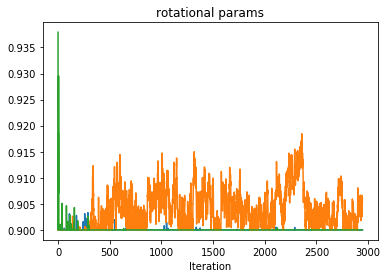

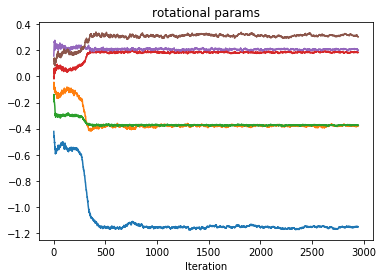

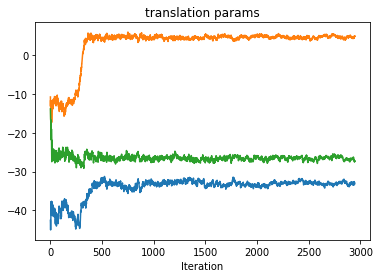

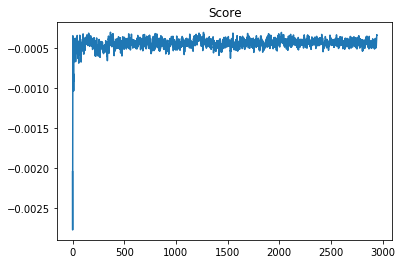

In [19]:
plot_alignment_results(traj=aligner.Ts[10:], scores=aligner.scores[10:], select_best='max_value')

In [ ]:


plot_alignment_results(traj=aligner.Ts, scores=aligner.scores, select_best='max_value')

tf_atlas_to_subj = compose_alignment_parameters([T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol, 
                                                         convert_transform_forms(aligner=aligner, out_form=(3,4))])

DataManager.save_alignment_results_v3(transform_parameters=convert_transform_forms(transform=tf_atlas_to_subj, out_form='dict'),
                       score_traj=aligner.scores,
                       parameter_traj=aligner.Ts,
                      alignment_spec=local_alignment_spec)


tf_atlas_to_subj = DataManager.load_alignment_results_v3(local_alignment_spec, what='parameters', out_form=(4,4))

name_s = structure_m

atlas_structure_wrt_canonicalAtlasSpace_atlasResol = DataManager.load_original_volume_v2(stack_spec=stack_m_spec, bbox_wrt='canonicalAtlasSpace', structure=name_s)

aligned_structure_wrt_wholebrain_inputResol = \
transform_volume_v4(volume=atlas_structure_wrt_canonicalAtlasSpace_atlasResol,
                    transform=tf_atlas_to_subj,
                    return_origin_instead_of_bbox=True)

DataManager.save_transformed_volume_v2(volume=aligned_structure_wrt_wholebrain_inputResol, 
                                       alignment_spec=local_alignment_spec)